## Loading data and dependencies

###  Load the necessary packages

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [20]:
# export
import numpy as np
import pandas as pd
from pathlib import Path
from typing import *
import torch
import torch.optim as optim

from fastai import *
from fastai.text import *
from pytorch_transformers import *


from fastai.basic_train import *
from fastai.basic_train import BasicLearner
import sys
from sklearn.model_selection import train_test_split


from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score

In [14]:
from exp.nb_Frame import *

NameError: name 'AG_NEWS_TRAIN' is not defined

In [3]:
## load ggplot support

import rpy2

# the base of rpy2 plotting is matplotlib, thus we need to declare
# it inline in order to see the plots in the notebook
%matplotlib inline

# we need to activate the automatic conversion for pandas
from rpy2.robjects import pandas2ri
pandas2ri.activate()

# load the needed extension for the %%R cell magic
%load_ext rpy2.ipython

###  Read in the data and split them

#### Read and process Ag_news data

In [21]:
DATA = Path(os.getcwd())/'Data'
AG_NEWS = Path(os.getcwd())/'Data'/'Ag_news'
header = ['class', 'title', 'describ']

In [16]:

#AG_NEWS_train = pd.read_csv(AG_NEWS_folder/'train.csv', names = header)

# sample a smaller version  


# AG_NEWS_TRAIN = AG_NEWS_TRAIN.iloc[:, 1:4]
# AG_NEWS_TRAIN.head()


In [22]:
# set the class dict for the class col
class_dict = {1: 'world', 
             2: 'sports',
             3: 'business',
             4: 'sci_tech'}

In [23]:
#AG_NEWS_TRAIN.to_feather(AG_NEWS/'training_30k')
AG_NEWS_TRAIN = pd.read_feather(AG_NEWS/'training_30k')
AG_NEWS_TRAIN['class'] = AG_NEWS_TRAIN['class'].map(class_dict)
AG_NEWS_TRAIN = AG_NEWS_TRAIN.sample(10000, axis= 0)
AG_NEWS_TRAIN = AG_NEWS_TRAIN.reset_index()
AG_NEWS_TRAIN = AG_NEWS_TRAIN.iloc[:, 1:4]
AG_NEWS_TRAIN.shape
#AG_NEWS_TRAIN.head()

(10000, 3)

In [9]:
#AG_NEWS_train['class'].value_counts() # evenly distributed with each class of size 30000

In [12]:
AG_NEWS_TEST = pd.read_csv(AG_NEWS/'test.csv', names = header)

#### read Dbpedia data 

In [47]:
DATA = Path(os.getcwd())/'Data'

DBPEDIA = DATA/'Dbpedia'
DBPEDIA.mkdir(exist_ok= True)
header = ['class', 'title', 'contents']

In [48]:
#DBPEDIA_train = pd.read_csv(DBPEDIA/'train.csv', names= header)

#DBPEDIA_train.shape # 559999 data entries


# sample a smaller version  

# DBPEDIA_TRAIN = DBPEDIA_train.sample(30000, axis= 0)
# DBPEDIA_TRAIN = DBPEDIA_TRAIN.reset_index()
# DBPEDIA_TRAIN = DBPEDIA_TRAIN.iloc[:, 1:4]
# DBPEDIA_TRAIN['class'].unique() #14 classes 

# DBPEDIA_TRAIN.to_feather(DBPEDIA/'training_30k')
DBPEDIA_TRAIN = pd.read_feather(DBPEDIA/'training_30k')
# read in the class dict
with open(DBPEDIA/'classes.txt', 'r') as f:
    class_ls = f.readlines()

class_ls = [re.sub('\n', "", i) for i in class_ls]

class_dict = {k:v for k, v in enumerate(class_ls)}

DBPEDIA_TRAIN['class'] = DBPEDIA_TRAIN['class'].map(class_dict) # The data has been class transformed
DBPEDIA_TRAIN = DBPEDIA_TRAIN[DBPEDIA_TRAIN['class'].notnull()] # mislabled one class in original dataset; filtered out here
DBPEDIA_TRAIN.shape

(27841, 3)

In [55]:
DBPEDIA_TRAIN.head()

,class,title,contents
0,Building,Peckett OQ Class,The Peckett OQ was a series of three Industri...
1,NaturalPlace,Yas Viceroy Abu Dhabi Hotel,Yas Viceroy Abu Dhabi Hotel is built across t...
2,Athlete,Stephen Frink,Stephen Frink is a prolific underwater photog...
3,Album,Centaurea diffusa,Diffuse Knapweed (Centaurea diffusa) also kno...
4,Village,Djedi River,Djedi River (French: Oued Djedi or Ouad-ed-Dj...


In [17]:
#DBPEDIA_test = pd.read_csv(DBPEDIA/'test.csv', names= header)

# DBPEDIA_TEST = DBPEDIA_test.sample(28000, axis= 0)
# DBPEDIA_TEST = DBPEDIA_TEST.reset_index()
# DBPEDIA_TEST = DBPEDIA_TEST.iloc[:, 1:4]
# DBPEDIA_TEST["class"].unique() #14 classes

# DBPEDIA_TEST.to_feather(DBPEDIA/'TESTING')
DBPEDIA_TEST = pd.read_feather(DBPEDIA/'TESTING')

#### read Yelp review data

In [73]:
YELP = DATA/'Yelp'
YELP.mkdir(exist_ok= True)
header = ['class', 'review']

In [74]:
# YELP_train = pd.read_csv(YELP/'train.csv', names= header)

# #DBPEDIA_train.shape # 559999 data entries


# # sample a smaller version

# YELP_TRAIN = YELP_train.sample(30000, axis= 0)
# YELP_TRAIN = YELP_TRAIN.reset_index()
# YELP_TRAIN = YELP_TRAIN.iloc[:, 1:3]

# # YELP_TRAIN.to_feather(YELP/'training_30k')
# YELP_TRAIN = pd.read_feather(YELP/'training_30k')

    
# YELP_TRAIN = YELP_TRAIN.sample(12500, axis= 0)
# YELP_TRAIN = YELP_TRAIN.reset_index()
# YELP_TRAIN = YELP_TRAIN.iloc[:, 1:3]

# YELP_TRAIN.to_feather(YELP/'training_10k')
YELP_TRAIN = pd.read_feather(YELP/'training_10k')


In [65]:
YELP_TRAIN.head()

,class,title
0,1,The apartment I rented was infested with scorp...
1,4,It seems like other folks had different experi...
2,5,Our first visit to this store was to go to the...
3,3,So nice to have a little wine spot in the neig...
4,3,Just your typical Arizonian Italian restaurant


In [23]:
#YELP_test = pd.read_csv(YELP/'test.csv', names = header)

# YELP_TEST = YELP_test.sample(10000, axis= 0)
# YELP_TEST = YELP_TEST.reset_index()
# YELP_TEST = YELP_TEST.iloc[:, 1:4]
# YELP_TEST["class"].unique() 

# YELP_TEST.to_feather(YELP/'TESTING')
YELP_TEST = pd.read_feather(YELP/'TESTING')

#### read Amazon review data

In [86]:
AMAZON = DATA/'Amazon_full'
AMAZON.mkdir(exist_ok= True)
header = ['class', 'title', 'review']

In [10]:
#AMAZON_train = pd.read_csv(AMAZON/'train.csv', names= header)


In [87]:
# sample a smaller version

# AMAZON_TRAIN = AMAZON_train.sample(12500, axis= 0)
# AMAZON_TRAIN = AMAZON_TRAIN.reset_index()
# AMAZON_TRAIN = AMAZON_TRAIN.iloc[:, 1:4]

# AMAZON_TRAIN.to_feather(AMAZON/'training_10k')
AMAZON_TRAIN = pd.read_feather(AMAZON/'training_10k')

In [77]:
AMAZON_TRAIN.head(2)

,class,title,review
0,1,Kindle version only,From reading the other comments the book sound...
1,4,A Perfect Family Film!!!,This was a really good movie about a little gi...


#### read customer complaints data

In [33]:
CUSTOMER = DATA/'Customer'
CUSTOMER.mkdir(exist_ok=True)

In [34]:
# CUSTOMER_train = pd.read_csv(CUSTOMER/'complaints.csv')


# CUSTOMER_train.shape

# header = ['Product', 'Consumer complaint narrative']
# CUSTOMER_train = CUSTOMER_train[header]

# CUSTOMER_train = CUSTOMER_train.loc[pd.notnull(CUSTOMER_train['Consumer complaint narrative']), :]
# CUSTOMER_train.shape


# CUSTOMER_TRAIN = CUSTOMER_train.sample(12500, axis= 0)
# CUSTOMER_TRAIN = CUSTOMER_TRAIN.reset_index()
# CUSTOMER_TRAIN = CUSTOMER_TRAIN.iloc[:, 1:3]
# CUSTOMER_TRAIN.columns = ['product', 'complaint']

# CUSTOMER_TRAIN.to_feather(CUSTOMER/'training_10k')
CUSTOMER_TRAIN = pd.read_feather(CUSTOMER/'training_10k')

In [134]:
CUSTOMER_TRAIN.head()

,product,complaint
0,Debt collection,"For over a month, I have been getting calls fr..."
1,"Credit reporting, credit repair services, or o...","XX/XX/XXXX, a series on letters to XXXX XXXX X..."
2,Mortgage,I recently received a statement from Wells Far...
3,"Credit reporting, credit repair services, or o...",I have been disputing XXXX XXXX XXXX account i...
4,"Credit reporting, credit repair services, or o...","I have several student loans on my account, in..."


## Evaluate algorithums across datasets


### Evaluate algorithm, marginize over #training and # class

#### Ag_news boostrap

##### ML models

In [4]:
df = AG_NEWS_TRAIN # set df as inner pointer to this dataset
df.head(2)

NameError: name 'AG_NEWS_TRAIN' is not defined

In [5]:
# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

NameError: name 'df' is not defined

In [11]:
# tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
#                         encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# features = tfidf.fit_transform(df.describ).toarray()  # features is the global var for this dataset block

# labels = df.category_id  # labels also a global var

# features.shape  # of size (30000, 24903)

(10000, 9065)

**The models haven been run and results saved,  thus no need to run the code below**

In [12]:
# models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#           LinearSVC(),
#           MultinomialNB(),
#           LogisticRegression(random_state=0, max_iter= 200)]

# boot_num = 2
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []

# for i in range(boot_num):
#     for model in models:
#         model_name = model.__class__.__name__
#         accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
#         for _, accuracy in enumerate(accuracies):
#             #print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
#             entries.append((model_name, accuracy))

        
# cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

In [64]:
#cv_df.to_csv(AG_NEWS/'ml_agnews_accu_10', index = False)
ml_agnews_accu_10 = pd.read_csv(AG_NEWS/'ml_agnews_accu_10')
ml_agnews_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.7155
1,RandomForestClassifier,0.6980
2,RandomForestClassifier,0.7285
3,RandomForestClassifier,0.7170
4,RandomForestClassifier,0.6925
5,LinearSVC,0.8740
6,LinearSVC,0.8725
7,LinearSVC,0.8825
8,LinearSVC,0.8800
9,LinearSVC,0.8830


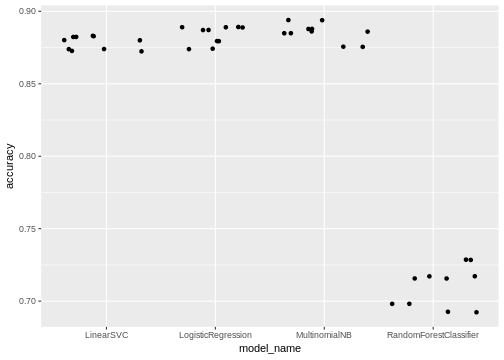

In [32]:
%%R -i cv_df -w 7 -h 5 -u in 

library(ggplot2)
ggplot(cv_df, aes(x= model_name)) +
    geom_jitter(aes(y = accuracy) )



##### DL methods

In [28]:
# export
# basic block
from pytorch_transformers import *


class Config(dict):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        for k, v in kwargs.items():
            setattr(self, k, v)

    def set(self, key, val):
        self[key] = val
        setattr(self, key, val)


config = Config(
    bert_model_name="bert-base-uncased",
    max_lr=3e-5,
    epochs=1,
    use_fp16=True,
    bs= 32,
    discriminative=False,
    max_seq_len=128,
   # num_labels=4  # Remember to set the num_labels here
)

bert_tok = BertTokenizer.from_pretrained(
    config.bert_model_name,
)


class FastAiBertTokenizer(BaseTokenizer):
    """Wrapper around BertTokenizer to be compatible with fast.ai"""

    def __init__(self, tokenizer: BertTokenizer, max_seq_len: int = 128, **kwargs):
        self._pretrained_tokenizer = tokenizer
        self.max_seq_len = max_seq_len

    def __call__(self, *args, **kwargs):
        return self

    def tokenizer(self, t: str) -> List[str]:
        """Limits the maximum sequence length"""
        return ["[CLS]"] + self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2] + ["[SEP]"]


fastai_tokenizer = Tokenizer(tok_func=FastAiBertTokenizer(
    bert_tok, max_seq_len=config.max_seq_len), pre_rules=[], post_rules=[])

fastai_bert_vocab = Vocab(list(bert_tok.vocab.keys()))



loss_func = nn.CrossEntropyLoss()


def loss_batch_bert(model: nn.Module, xb: Tensor, yb: Tensor, loss_func: OptLossFunc = None, opt: OptOptimizer = None,
                    cb_handler: Optional[CallbackHandler] = None) -> Tuple[Union[Tensor, int, float, str]]:
    "Calculate loss and metrics for a batch, call out to callbacks as necessary."
    cb_handler = ifnone(cb_handler, CallbackHandler())
    if not is_listy(xb):
        xb = [xb]
    if not is_listy(yb):
        yb = [yb]
    out = model(*xb)
    # pdb.set_trace()
    out = out[0]
    out = cb_handler.on_loss_begin(out)

    if not loss_func:
        return to_detach(out), yb[0].detach()
    loss = loss_func(out, *yb)

    if opt is not None:
        loss, skip_bwd = cb_handler.on_backward_begin(loss)
        if not skip_bwd:
            loss.backward()
        if not cb_handler.on_backward_end():
            opt.step()
        if not cb_handler.on_step_end():
            opt.zero_grad()

    return loss.detach().cpu()


# To change the loss_batch function in the loaded fastai module
module_basic_train = sys.modules['fastai.basic_train']
module_basic_train.loss_batch = loss_batch_bert
sys.modules['fastai.basic_train'] = module_basic_train

In [14]:
#train, val = train_test_split(df)
label_cols = ['class']

#bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= config.num_labels)

accus = []

# use StratifiedKFold to CV 5 folds 
for train_idx, val_idx in StratifiedKFold(n_splits=5,  shuffle=True).split(df, df['class']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 4)
    
    databunch = TextDataBunch.from_df(AG_NEWS, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "describ",
                      label_cols=label_cols,
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)

    learner.fit_one_cycle(5, 1e-04)
    _, accu = learner.validate()
    accus.append(accu)
    


In [43]:
accus = [i.item() for i in accus]

In [44]:
accus

[0.9104999899864197,
 0.921500027179718,
 0.9235000014305115,
 0.9144999980926514,
 0.9114999771118164]

In [45]:
bert_agnews_accu_5 = pd.DataFrame({
    'model_name' : ['Bert'] * 5,
    'accuracy' : accus
})

bert_agnews_accu_5.to_csv(AG_NEWS/'bert_agnews_accu_5', index = False)
bert_agnews_accu_5 = pd.read_csv(AG_NEWS/'bert_agnews_accu_5')

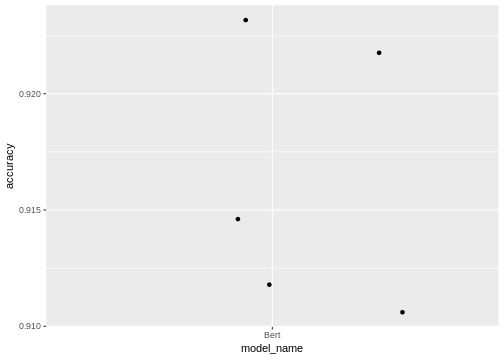

In [46]:
%%R -i bert_agnews_accu_5 -w 7 -h 5 -u in 
#library(ggplot2)
ggplot(bert_agnews_accu_5, aes(x= model_name)) +
    geom_jitter(aes(y = accuracy) )



#### Dbpedia data

##### ML part

In [10]:
df = DBPEDIA_TRAIN # set df as inner pointer to this dataset
df.head(2)

# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.contents).toarray()  # features is the global var for this dataset block

labels = df.category_id  # labels also a global var

features.shape  # of size (30000, 24903)

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

boot_num = 2
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for i in range(boot_num):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for _, accuracy in enumerate(accuracies):
            print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
            entries.append((model_name, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

finished RandomForestClassifier, 0th bootstrap of 0th epochs
finished RandomForestClassifier, 0th bootstrap of 1th epochs
finished RandomForestClassifier, 0th bootstrap of 2th epochs
finished RandomForestClassifier, 0th bootstrap of 3th epochs
finished RandomForestClassifier, 0th bootstrap of 4th epochs
finished LinearSVC, 0th bootstrap of 0th epochs
finished LinearSVC, 0th bootstrap of 1th epochs
finished LinearSVC, 0th bootstrap of 2th epochs
finished LinearSVC, 0th bootstrap of 3th epochs
finished LinearSVC, 0th bootstrap of 4th epochs
finished MultinomialNB, 0th bootstrap of 0th epochs
finished MultinomialNB, 0th bootstrap of 1th epochs
finished MultinomialNB, 0th bootstrap of 2th epochs
finished MultinomialNB, 0th bootstrap of 3th epochs
finished MultinomialNB, 0th bootstrap of 4th epochs
finished LogisticRegression, 0th bootstrap of 0th epochs
finished LogisticRegression, 0th bootstrap of 1th epochs
finished LogisticRegression, 0th bootstrap of 2th epochs
finished LogisticRegress

In [11]:
cv_df.to_csv(DBPEDIA/'ml_dbpedia_accu_10', index = False)
ml_dbpedia_accu_10 = pd.read_csv(DBPEDIA/'ml_dbpedia_accu_10')
ml_dbpedia_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.811995
1,RandomForestClassifier,0.815374
2,RandomForestClassifier,0.817349
3,RandomForestClassifier,0.815553
4,RandomForestClassifier,0.818068
5,LinearSVC,0.976836
6,LinearSVC,0.975036
7,LinearSVC,0.976293
8,LinearSVC,0.971085
9,LinearSVC,0.970726


##### DL part

In [90]:
label_cols = ['class']
accus = []

# use StratifiedKFold to CV 5 folds 
for train_idx, val_idx in StratifiedKFold(n_splits=5,  shuffle=True).split(df, df['class']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 13)
    
    databunch = TextDataBunch.from_df(DBPEDIA, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "contents",
                      label_cols=label_cols,
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)

    learner.fit_one_cycle(5, 1e-04, moms=(0.8,0.7))
    _, accu = learner.validate()
    accus.append(accu)

epoch,train_loss,valid_loss,accuracy,time
0,0.101611,0.057224,0.988508,02:49
1,0.066836,0.067512,0.984917,02:49
2,0.039955,0.052604,0.988508,02:49
3,0.022419,0.044344,0.990663,02:49
4,0.012598,0.043295,0.992279,02:49


epoch,train_loss,valid_loss,accuracy,time
0,0.127935,0.071032,0.985991,03:11
1,0.081126,0.069929,0.984555,02:57
2,0.030810,0.064293,0.988147,03:08
3,0.015263,0.054442,0.988865,02:58
4,0.006597,0.059375,0.989045,02:51


epoch,train_loss,valid_loss,accuracy,time
0,0.122561,0.074562,0.986530,03:14
1,0.077386,0.065294,0.985991,02:50
2,0.038542,0.069332,0.983118,03:10
3,0.017741,0.053479,0.987967,03:09
4,0.012268,0.055812,0.990302,03:00


epoch,train_loss,valid_loss,accuracy,time
0,0.131571,0.073313,0.986889,03:19
1,0.074705,0.056656,0.987428,03:11
2,0.047166,0.055322,0.985632,03:13
3,0.019190,0.051438,0.988506,03:04
4,0.008112,0.050731,0.990122,03:19


epoch,train_loss,valid_loss,accuracy,time
0,0.132279,0.066882,0.987249,02:56
1,0.070772,0.063918,0.985991,03:17
2,0.040303,0.053309,0.988326,03:13
3,0.021852,0.054179,0.987249,02:49
4,0.008462,0.054850,0.987967,02:53


In [96]:
#learner.save('dbpedia_learner_bert')
learner.load('dbpedia_learner_bert')

Learner(data=TextClasDataBunch;

Train: LabelList (22273 items)
x: TextList
[CLS] ya ##s viceroy abu dhabi hotel is built across the f1 ya ##s marina circuit in abu dhabi . [SEP],[CLS] stephen fr ##ink is a prolific underwater photographer and frequent contributor to scuba diving magazine . fr ##ink was born in illinois and moved to key la ##rgo florida in 1978 where he currently lives with his wife and daughter . he is often cited as one of the most frequently published underwater photographers in the world . [ 1 ] [ 2 ] [ 3 ] [SEP],[CLS] diffuse kn ##ap ##weed ( cent ##aur ##ea di ##ff ##usa ) also known as white kn ##ap ##weed or tumble kn ##ap ##weed is a member of the genus cent ##aur ##ea in the family as ##tera ##ceae . [SEP],[CLS] dj ##ed ##i river ( french : ou ##ed dj ##ed ##i or ou ##ad - ed - dj ##ed ##i ) or dj ##edd ##i river is a wadi ( river with intermittent stream ) in algeria and one of the largest rivers of sahara . it starts in the saharan atlas mountains at elevat

In [97]:
interp = ClassificationInterpretation.from_learner(learner)

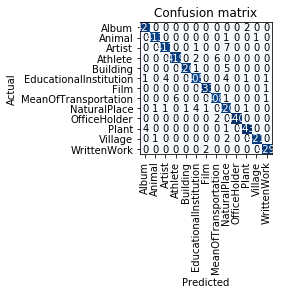

In [99]:
interp.plot_confusion_matrix()

In [93]:
accus = [i.item() for i in accus]
bert_dbpedia_accu_5 = pd.DataFrame({
    'model_name' : ['Bert'] * 5,
    'accuracy' : accus
})

bert_dbpedia_accu_5.to_csv(DBPEDIA/'bert_dbpedia_accu_5.csv', index = False)
bert_dbpedia_accu_5 = pd.read_csv(DBPEDIA/'bert_dbpedia_accu_5.csv')

#### Yelp review data

##### ML

In [8]:
df = YELP_TRAIN

In [9]:
df.shape

(12500, 2)

In [10]:


# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.title).toarray()  # features is the global var for this dataset block

labels = df.category_id  # labels also a global var

features.shape

(12500, 25186)

In [11]:

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

boot_num = 2
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for i in range(boot_num):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for _, accuracy in enumerate(accuracies):
            print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
            entries.append((model_name, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

finished RandomForestClassifier, 0th bootstrap of 0th epochs
finished RandomForestClassifier, 0th bootstrap of 1th epochs
finished RandomForestClassifier, 0th bootstrap of 2th epochs
finished RandomForestClassifier, 0th bootstrap of 3th epochs
finished RandomForestClassifier, 0th bootstrap of 4th epochs
finished LinearSVC, 0th bootstrap of 0th epochs
finished LinearSVC, 0th bootstrap of 1th epochs
finished LinearSVC, 0th bootstrap of 2th epochs
finished LinearSVC, 0th bootstrap of 3th epochs
finished LinearSVC, 0th bootstrap of 4th epochs
finished MultinomialNB, 0th bootstrap of 0th epochs
finished MultinomialNB, 0th bootstrap of 1th epochs
finished MultinomialNB, 0th bootstrap of 2th epochs
finished MultinomialNB, 0th bootstrap of 3th epochs
finished MultinomialNB, 0th bootstrap of 4th epochs
finished LogisticRegression, 0th bootstrap of 0th epochs
finished LogisticRegression, 0th bootstrap of 1th epochs
finished LogisticRegression, 0th bootstrap of 2th epochs
finished LogisticRegress

In [12]:
cv_df.to_csv(YELP/'ml_yelp_accu_10', index = False)
ml_yelp_accu_10 = pd.read_csv(YELP/'ml_yelp_accu_10')
ml_yelp_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.4264
1,RandomForestClassifier,0.4232
2,RandomForestClassifier,0.4300
3,RandomForestClassifier,0.4032
4,RandomForestClassifier,0.4252
5,LinearSVC,0.4868
6,LinearSVC,0.4924
7,LinearSVC,0.5016
8,LinearSVC,0.4744
9,LinearSVC,0.4900


##### DL

In [33]:
label_cols = ['class']
accus = []

# use StratifiedKFold to CV 5 folds 
for train_idx, val_idx in StratifiedKFold(n_splits=5,  shuffle=True).split(df, df['class']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )
    
    databunch = TextDataBunch.from_df(YELP, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "title",
                      label_cols=label_cols,
                      bs= 72,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)
    #learner.load('premilinary_learner_Yelp_3epochs')
    learner.fit_one_cycle(6, 1e-04)
    _, accu = learner.validate()
    accus.append(accu)

epoch,train_loss,valid_loss,accuracy,time
0,1.301233,1.093577,0.521600,01:59
1,1.066599,1.036332,0.547600,01:58
2,0.883455,1.063862,0.554000,01:51
3,0.620126,1.193738,0.563200,02:03
4,0.306274,1.494803,0.555200,01:55
5,0.159709,1.614236,0.564400,01:55


epoch,train_loss,valid_loss,accuracy,time
0,1.258032,1.056155,0.545600,01:51
1,1.027700,1.038325,0.539200,01:58
2,0.831533,1.027231,0.566000,02:01
3,0.569622,1.179452,0.586000,02:00
4,0.300900,1.478549,0.586400,01:51
5,0.145904,1.583525,0.576000,02:02


epoch,train_loss,valid_loss,accuracy,time
0,1.264295,1.073345,0.528000,02:04
1,1.049571,1.103960,0.500400,02:02
2,0.808547,1.039969,0.575600,02:03
3,0.555421,1.243597,0.560000,01:51
4,0.280465,1.522083,0.577200,02:03
5,0.140278,1.657011,0.574000,01:58


epoch,train_loss,valid_loss,accuracy,time
0,1.263664,1.040612,0.541200,02:04
1,1.038413,1.003886,0.560000,01:51
2,0.808130,0.995627,0.578400,02:00
3,0.551050,1.160672,0.574400,01:56
4,0.275472,1.495857,0.579200,01:57
5,0.136960,1.593938,0.576000,01:55


epoch,train_loss,valid_loss,accuracy,time
0,1.264468,1.043323,0.528800,01:59
1,1.039918,1.003320,0.555200,02:02
2,0.843496,1.024616,0.554000,01:53
3,0.555465,1.190338,0.558000,02:03
4,0.274542,1.483281,0.566000,02:00
5,0.143104,1.600284,0.568800,01:58


In [34]:
accus = [i.item() for i in accus]
bert_yelp_accu_5 = pd.DataFrame({
    'model_name' :['Bert'] * 5,
    'accuracy' : accus
})

bert_yelp_accu_5.to_csv(YELP/'bert_yelp_accu_5.csv', index = False)
bert_yelp_accu_5 = pd.read_csv(YELP/'bert_yelp_accu_5.csv')

In [35]:
bert_yelp_accu_5

,model_name,accuracy
0,Bert,0.5644
1,Bert,0.5760
2,Bert,0.5740
3,Bert,0.5760
4,Bert,0.5688


In [36]:
learner.save('yelp_10k_learner')

In [37]:
interp_yelp_10k = ClassificationInterpretation.from_learner(learner)

In [47]:
pd.DataFrame(interp_yelp_10k.confusion_matrix()).to_csv('confusion_matrix_bert.csv')

#### Amazon reviews

In [13]:
df = AMAZON_TRAIN

In [19]:
print(df.head(2))
df.shape

   class                     title  \
0      1       Kindle version only   
1      4  A Perfect Family Film!!!   

                                              review  
0  From reading the other comments the book sound...  
1  This was a really good movie about a little gi...  


(12500, 3)

##### ML models

In [12]:



# Set the global vars for this dataset for diverse algorithums

df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.review).toarray()  # features is the global var for this dataset block

labels = df.category_id  # labels also a global var

features.shape

NameError: name 'df' is not defined

In [42]:

models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

boot_num = 2
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for i in range(boot_num):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for _, accuracy in enumerate(accuracies):
            print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
            entries.append((model_name, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

finished RandomForestClassifier, 0th bootstrap of 0th epochs
finished RandomForestClassifier, 0th bootstrap of 1th epochs
finished RandomForestClassifier, 0th bootstrap of 2th epochs
finished RandomForestClassifier, 0th bootstrap of 3th epochs
finished RandomForestClassifier, 0th bootstrap of 4th epochs
finished LinearSVC, 0th bootstrap of 0th epochs
finished LinearSVC, 0th bootstrap of 1th epochs
finished LinearSVC, 0th bootstrap of 2th epochs
finished LinearSVC, 0th bootstrap of 3th epochs
finished LinearSVC, 0th bootstrap of 4th epochs
finished MultinomialNB, 0th bootstrap of 0th epochs
finished MultinomialNB, 0th bootstrap of 1th epochs
finished MultinomialNB, 0th bootstrap of 2th epochs
finished MultinomialNB, 0th bootstrap of 3th epochs
finished MultinomialNB, 0th bootstrap of 4th epochs
finished LogisticRegression, 0th bootstrap of 0th epochs
finished LogisticRegression, 0th bootstrap of 1th epochs
finished LogisticRegression, 0th bootstrap of 2th epochs
finished LogisticRegress

In [43]:
cv_df.to_csv(AMAZON/'ml_amazon_accu_10', index = False)
ml_amazon_accu_10 = pd.read_csv(AMAZON/'ml_amazon_accu_10')
ml_amazon_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.3752
1,RandomForestClassifier,0.3620
2,RandomForestClassifier,0.3688
3,RandomForestClassifier,0.3752
4,RandomForestClassifier,0.3700
5,LinearSVC,0.3904
6,LinearSVC,0.3956
7,LinearSVC,0.3968
8,LinearSVC,0.3940
9,LinearSVC,0.3972


##### DL models

In [20]:
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['class'], test_size= 2000)

In [72]:
train

,class,title,review
0,1,Kindle version only,From reading the other comments the book sound...
1,4,A Perfect Family Film!!!,This was a really good movie about a little gi...
2,2,Not helpful,This book by Kaplan was not helpful at all. I ...
5,1,Don't Waste Your Money or Time,This book was ridiculous. A scary mentally-ill...
9,2,question,When will my book come and why hasnt it be shi...
...,...,...,...
12494,2,Kindle edition: modified and based on NIV!,My two star rating is not based on the content...
12495,4,Can't Beat Bad Boy Bill,"This album is incredible- it never slows down,..."
12496,2,"The band sucked, where was Ronni Wood just for...","Rod sang well, the slow songs were excellent. ..."
12498,2,"Needs some getting used to, but ok as a back up","I purchased these gloves, which are the fourth..."


In [21]:
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )
    
databunch = TextDataBunch.from_df(AMAZON, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "review",
                      label_cols=label_cols,
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )

In [22]:
learner = Learner(
databunch, bert_model,
loss_func=loss_func, metrics = accuracy)

In [23]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


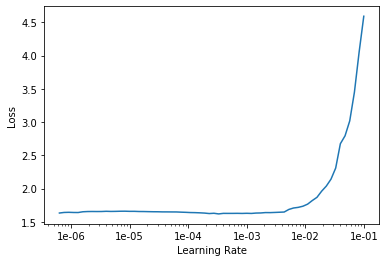

In [24]:
learner.recorder.plot()

In [25]:
learner.fit_one_cycle(5, 1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,1.245739,1.161839,0.509600,01:38
1,1.074768,1.074270,0.540800,01:39
2,0.832951,1.121209,0.542000,01:45
3,0.484953,1.387535,0.540800,01:45
4,0.258757,1.564786,0.543200,01:46


In [31]:
learner.model.modules

<bound method Module.modules of BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): Laye

In [33]:
learner.unfreeze()

In [34]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


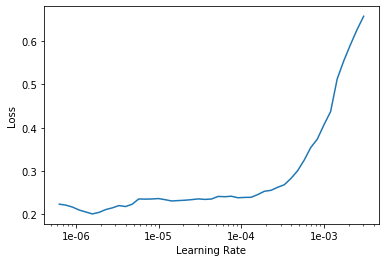

In [35]:
learner.recorder.plot()

In [37]:
learner.fit_one_cycle(4, 1e-07)

epoch,train_loss,valid_loss,accuracy,time
0,0.205402,1.644708,0.542000,01:55
1,0.181758,1.650108,0.540400,01:40
2,0.168915,1.652564,0.539200,01:39
3,0.187932,1.652317,0.540000,01:55


In [38]:
accus = []
_, accu = learner.validate()
accus.append(accu)

In [39]:
accus

[tensor(0.5400)]

In [41]:
label_cols = ['class']
#accus = []

# use StratifiedKFold to CV 5 folds 
for train_idx, val_idx in StratifiedKFold(n_splits=4,  shuffle=True).split(df, df['class']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )
    
    databunch = TextDataBunch.from_df(AMAZON, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= "review",
                      label_cols=label_cols,
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)
    learner.fit_one_cycle(6, 1e-04)
    _, accu = learner.validate()
    accus.append(accu)

epoch,train_loss,valid_loss,accuracy,time
0,1.318032,1.134286,0.505920,01:39
1,1.105683,1.098517,0.520000,01:46
2,0.876364,1.148601,0.526080,01:41
3,0.582358,1.305987,0.521920,01:35
4,0.292922,1.667748,0.523840,01:35
5,0.158017,1.764473,0.534080,01:46


epoch,train_loss,valid_loss,accuracy,time
0,1.348477,1.152064,0.505280,01:44
1,1.097309,1.158527,0.504960,01:34
2,0.892958,1.191023,0.499520,01:35
3,0.630334,1.275178,0.529280,01:49
4,0.337079,1.580369,0.542080,01:34
5,0.173765,1.700767,0.539200,01:34


epoch,train_loss,valid_loss,accuracy,time
0,1.287190,1.184066,0.491840,01:45
1,1.106318,1.182073,0.487680,01:47
2,0.897025,1.145717,0.520000,01:48
3,0.613639,1.357560,0.520320,01:37
4,0.341400,1.560428,0.529600,01:41
5,0.179715,1.714976,0.521920,01:38


epoch,train_loss,valid_loss,accuracy,time
0,1.289394,1.176555,0.506240,01:40
1,1.085968,1.068228,0.540160,01:43
2,0.875283,1.119443,0.541120,01:35
3,0.568936,1.371471,0.518080,01:42
4,0.274139,1.717358,0.528960,01:37
5,0.153675,1.818474,0.529600,01:49


In [49]:
accus = [i.item() for i in accus]
bert_amazon_accu_5 = pd.DataFrame({
    'model_name' :['Bert'] * 5,
    'accuracy' : accus
})

bert_amazon_accu_5.to_csv(AMAZON/'bert_amazon_accu_5.csv', index = False)
bert_amazon_accu_5 = pd.read_csv(AMAZON/'bert_amazon_accu_5.csv')

,model_name,accuracy
0,Bert,0.55000
1,Bert,0.54408
2,Bert,0.54920
3,Bert,0.53192
4,Bert,0.53960


#### Customer complaints

In [12]:
df = CUSTOMER_TRAIN
df.head(2)

,product,complaint
0,Debt collection,"For over a month, I have been getting calls fr..."
1,"Credit reporting, credit repair services, or o...","XX/XX/XXXX, a series on letters to XXXX XXXX X..."


##### ML models

In [52]:

# Set the global vars for this dataset for diverse algorithums

## Need to change the df.col in the tfidf tranform method


df['category_id'] = df['product'].factorize()[0]

category_id_df = df[['product', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(df.complaint).toarray()  # features is the global var for this dataset block

labels = df.category_id  # labels also a global var

features.shape

(12500, 45397)

In [77]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

boot_num = 2
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for i in range(boot_num):
    for model in models:
        model_name = model.__class__.__name__
        accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
        for _, accuracy in enumerate(accuracies):
            print(f'finished {model_name}, {i}th bootstrap of {_}th epochs')
            entries.append((model_name, accuracy))

        
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished RandomForestClassifier, 0th bootstrap of 0th epochs
finished RandomForestClassifier, 0th bootstrap of 1th epochs
finished RandomForestClassifier, 0th bootstrap of 2th epochs
finished RandomForestClassifier, 0th bootstrap of 3th epochs
finished RandomForestClassifier, 0th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished LinearSVC, 0th bootstrap of 0th epochs
finished LinearSVC, 0th bootstrap of 1th epochs
finished LinearSVC, 0th bootstrap of 2th epochs
finished LinearSVC, 0th bootstrap of 3th epochs
finished LinearSVC, 0th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished MultinomialNB, 0th bootstrap of 0th epochs
finished MultinomialNB, 0th bootstrap of 1th epochs
finished MultinomialNB, 0th bootstrap of 2th epochs
finished MultinomialNB, 0th bootstrap of 3th epochs
finished MultinomialNB, 0th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished LogisticRegression, 0th bootstrap of 0th epochs
finished LogisticRegression, 0th bootstrap of 1th epochs
finished LogisticRegression, 0th bootstrap of 2th epochs
finished LogisticRegression, 0th bootstrap of 3th epochs
finished LogisticRegression, 0th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished RandomForestClassifier, 1th bootstrap of 0th epochs
finished RandomForestClassifier, 1th bootstrap of 1th epochs
finished RandomForestClassifier, 1th bootstrap of 2th epochs
finished RandomForestClassifier, 1th bootstrap of 3th epochs
finished RandomForestClassifier, 1th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished LinearSVC, 1th bootstrap of 0th epochs
finished LinearSVC, 1th bootstrap of 1th epochs
finished LinearSVC, 1th bootstrap of 2th epochs
finished LinearSVC, 1th bootstrap of 3th epochs
finished LinearSVC, 1th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished MultinomialNB, 1th bootstrap of 0th epochs
finished MultinomialNB, 1th bootstrap of 1th epochs
finished MultinomialNB, 1th bootstrap of 2th epochs
finished MultinomialNB, 1th bootstrap of 3th epochs
finished MultinomialNB, 1th bootstrap of 4th epochs


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


finished LogisticRegression, 1th bootstrap of 0th epochs
finished LogisticRegression, 1th bootstrap of 1th epochs
finished LogisticRegression, 1th bootstrap of 2th epochs
finished LogisticRegression, 1th bootstrap of 3th epochs
finished LogisticRegression, 1th bootstrap of 4th epochs


In [78]:
cv_df.to_csv(YELP/'ml_customer_accu_10', index = False)
ml_customer_accu_10 = pd.read_csv(YELP/'ml_customer_accu_10')
ml_customer_accu_10

,model_name,accuracy
0,RandomForestClassifier,0.3048
1,RandomForestClassifier,0.2952
2,RandomForestClassifier,0.3164
3,RandomForestClassifier,0.3140
4,RandomForestClassifier,0.3040
5,LinearSVC,0.7144
6,LinearSVC,0.7104
7,LinearSVC,0.7088
8,LinearSVC,0.7004
9,LinearSVC,0.7188


##### DL models

In [67]:
df.head(2)

,product,complaint
0,Debt collection,"For over a month, I have been getting calls fr..."
1,"Credit reporting, credit repair services, or o...","XX/XX/XXXX, a series on letters to XXXX XXXX X..."


In [74]:
x_train, x_test, y_train, y_test = train_test_split(df['complaint'], df['product'], test_size= 2000)
train = pd.DataFrame({'complaint': x_train, 
                     'product': y_train})
val = pd.DataFrame({'complaint': x_test, 
                     'product': y_test})

In [76]:
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 18 )
    
databunch = TextDataBunch.from_df(CUSTOMER, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= 'complaint',
                      label_cols= 'product',
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )

In [77]:
learner = Learner(
databunch, bert_model,
loss_func=loss_func, metrics = accuracy)

In [78]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


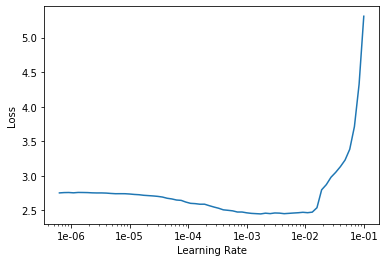

In [79]:
learner.recorder.plot()

In [81]:
learner.fit_one_cycle(2, 1e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.218055,0.929374,0.729000,02:05
1,0.174284,0.942612,0.728000,02:07


In [16]:
accus = [0.7280, 0.731, 0.7280, 0.735, 0.724]

In [17]:
accus

[0.728, 0.731]

In [18]:
for train_idx, val_idx in StratifiedKFold(n_splits=5,  shuffle=True).split(df, df['product']):
    train = df.iloc[train_idx, :]
    val = df.iloc[val_idx, :]
    bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 18 )
    
    databunch = TextDataBunch.from_df(CUSTOMER, train, val,
                      tokenizer=fastai_tokenizer,
                      vocab=fastai_bert_vocab,
                      include_bos=False,
                      include_eos=False,
                      text_cols= 'complaint',
                      label_cols= 'product',
                      bs= 64,
                      collate_fn=partial(pad_collate, pad_first=False, pad_idx=0),
                 )
    
    learner = Learner(
    databunch, bert_model,
    loss_func=loss_func, metrics = accuracy)
    learner.fit_one_cycle(6, 1.5 * 1e-04)


    _, accu = learner.validate()
    accus.append(accu)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


epoch,train_loss,valid_loss,accuracy,time
0,1.560283,1.187861,0.632800,02:07
1,1.030226,0.952939,0.689600,02:03
2,0.838607,1.029946,0.680800,02:07
3,0.624467,0.910273,0.708400,02:08
4,0.408372,0.929432,0.726800,02:05
5,0.264990,0.961888,0.728000,02:09


epoch,train_loss,valid_loss,accuracy,time
0,1.561800,1.131997,0.650400,02:07
1,1.076326,0.992753,0.678800,02:06
2,0.853779,0.959748,0.683600,02:03
3,0.595374,0.857262,0.734800,02:08
4,0.360151,0.905311,0.742400,02:08
5,0.202762,0.950534,0.735200,02:05


epoch,train_loss,valid_loss,accuracy,time
0,1.596745,1.208017,0.632800,02:08
1,1.056719,1.051430,0.654400,02:09
2,0.852332,0.914384,0.703600,02:04
3,0.595727,0.902735,0.728400,02:08
4,0.359024,0.930540,0.720800,02:04
5,0.222540,0.968150,0.724800,02:00


epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [25]:
bert_customer_accu_5 = pd.DataFrame({
    'model_name' :['Bert'] * 5,
    'accuracy' : accus
})

bert_customer_accu_5.to_csv(CUSTOMER/'bert_customer__accu_5.csv', index = False)
bert_customer__accu_5 = pd.read_csv(CUSTOMER/'bert_customer__accu_5.csv')

In [26]:
bert_customer__accu_5

,model_name,accuracy
0,Bert,0.7280
1,Bert,0.7310
2,Bert,0.7280
3,Bert,0.7352
4,Bert,0.7248


In [22]:
accus = [0.728, 0.731, 0.7280, 0.7352, 0.7248]

## Evaluate algorithums * training size across datasets

#### Ag_news

##### ML models

In [24]:
# export
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]




In [25]:
df = AG_NEWS_TRAIN

In [20]:
# Set the global vars for this dataset for diverse algorithums
df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.describ).toarray()
labels = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)


In [27]:
# export
def algo_training_size_looper(size: list, x_train, y_train, x_test, y_test):
    """Loop over a dataset with varying training size and algorithums and returns a dataframe.
    
    This function loops over the combination of algorithum and different training size.
    This function outputs a dataframe with three columns 'model_name', 'training_size', and 'accuracy.'

    """
    
    entries = []
    for n in size:
        # sub sample n first


        boot_num = 6
        
        for i in range(boot_num):
             for model in models:
                    
                index = np.random.randint(0, len(x_train), n)
                x_train_sub = x_train[index]
                y_train_sub = [list(y_train)[i] for i in index]
                
                model_name = model.__class__.__name__
            
                model.fit(x_train_sub, y_train_sub)
                y_pred = model.predict(x_test)
                accuracy = accuracy_score(y_pred, y_test)

                print(
                    f'finished {model_name}, {i}th bootstrap of size{n}')
                entries.append((model_name, n, accuracy))
                
    return pd.DataFrame(entries, columns=['model_name', 'training_size', 'accuracy'])

In [26]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished RandomForestClassifier, 0th bootstrap of size1600
finished LinearSVC, 0th bootstrap of size1600
finished MultinomialNB, 0th bootstrap of size1600
finished LogisticRegression, 0th bootstrap of size1600
finished RandomForestClassifier, 1th bootstrap of size1600
finished LinearSVC, 1th bootstrap of size1600
finished MultinomialNB, 1th bootstrap of size1600
finished LogisticRegression, 1th bootstrap of size1600
finished RandomForestClassifier, 2th bootstrap of size1600
finished LinearSVC, 2th bootstrap of size1600
finished MultinomialNB, 2th bootstrap of size1600
finished LogisticRegression, 2th bootstrap of size1600
finished RandomForestClassifier, 3th bootstrap of size1600
finished LinearSVC, 3th bootstrap of size1600
finished MultinomialNB, 3th bootstrap of size1600
finished LogisticRegression, 3th bootstrap of size1600
finished RandomForestClassifier, 4th bootstrap of size1600
finished LinearSVC, 4th bootstrap of size1600
finished MultinomialNB, 4th bootstrap of size1600
finis

In [28]:
res.to_csv(AG_NEWS/"Algo_size_7_4_10_subsample.csv")


##### DL

In [29]:
df = AG_NEWS_TRAIN

x_train, x_test, y_train, y_test = train_test_split(df['describ'], df['class'], test_size=2000, random_state=0)
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )


In [ ]:
train = pd.DataFrame({'describe': x_train, 
                      'class': y_train})
val = pd.DataFrame({'describe': x_test, 
                      'class': y_test})
train = train.reset_index()[['describe', 'class']]
val = val.reset_index()[['describe', 'class']]
val

In [30]:
text_cols = "describe"
label_cols = 'class'

In [31]:
# export
def algo_training_size_looper_dl(size: list, path,  train, val, num_labels, bs = 64):
    """Loop over a dataset with varying training size and algorithums and returns a dataframe.


    """

    accus = []
    for n in size:
        # sub sample n first


        boot_num = 5

        for i in range(boot_num):
            
            index = np.random.randint(0, len(train), n)
            sub_train = train.iloc[index, :].reset_index(drop=True)

            databunch = TextDataBunch.from_df(path, sub_train, val,
                                          tokenizer=fastai_tokenizer,
                                          vocab=fastai_bert_vocab,
                                          include_bos=False,
                                          include_eos=False,
                                          text_cols=text_cols,
                                          label_cols=label_cols,
                                          bs=bs,
                                          collate_fn=partial(
                                              pad_collate, pad_first=False, pad_idx=0),
                                          )
            bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= num_labels)

            learner = Learner(
            databunch, bert_model,
            loss_func=loss_func, metrics = accuracy)

            learner.fit_one_cycle(5, 3* 1e-04)
            learner.fit_one_cycle(1, 1e-05)

            _, accu = learner.validate()
            accu = accu.item()
            accus.append(("bert", n, accu))
            print(
                f'finished {i}th bootstrap of size{n}')

    return pd.DataFrame(accus, columns=['model_name', 'training_size', 'accuracy'])

In [32]:
res = algo_training_size_looper_dl([100, 200, 400, 800, 1600, 3200, 5000], AG_NEWS, train, val, 4 )

epoch,train_loss,valid_loss,accuracy,time
0,1.390056,1.394569,0.266000,00:05
1,1.364180,1.298279,0.480500,00:04


KeyboardInterrupt: 

In [124]:
res['accuracy'] = [i.item() for i in res['accuracy']]

res.to_csv(AG_NEWS/"dl_Algo_size_7_bert5_agnews.csv", index = False)

#### Dbpedia

##### ML models

In [56]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = DBPEDIA_TRAIN

In [57]:
df.head(2)

,class,title,contents
0,Building,Peckett OQ Class,The Peckett OQ was a series of three Industri...
1,NaturalPlace,Yas Viceroy Abu Dhabi Hotel,Yas Viceroy Abu Dhabi Hotel is built across t...


In [58]:
df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.contents).toarray()
labels = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)

In [59]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished RandomForestClassifier, 0th bootstrap of size1600
finished LinearSVC, 0th bootstrap of size1600
finished MultinomialNB, 0th bootstrap of size1600
finished LogisticRegression, 0th bootstrap of size1600
finished RandomForestClassifier, 1th bootstrap of size1600
finished LinearSVC, 1th bootstrap of size1600
finished MultinomialNB, 1th bootstrap of size1600
finished LogisticRegression, 1th bootstrap of size1600
finished RandomForestClassifier, 2th bootstrap of size1600
finished LinearSVC, 2th bootstrap of size1600
finished MultinomialNB, 2th bootstrap of size1600
finished LogisticRegression, 2th bootstrap of size1600
finished RandomForestClassifier, 3th bootstrap of size1600
finished LinearSVC, 3th bootstrap of size1600
finished MultinomialNB, 3th bootstrap of size1600
finished LogisticRegression, 3th bootstrap of size1600
finished RandomForestClassifier, 4th bootstrap of size1600
finished LinearSVC, 4th bootstrap of size1600
finished MultinomialNB, 4th bootstrap of size1600
finis

In [60]:
res

,model_name,training_size,accuracy
0,RandomForestClassifier,100,0.1475
1,LinearSVC,100,0.7210
2,MultinomialNB,100,0.3605
3,LogisticRegression,100,0.3200
4,RandomForestClassifier,100,0.1690
...,...,...,...
275,LogisticRegression,5000,0.9525
276,RandomForestClassifier,5000,0.7760
277,LinearSVC,5000,0.9640
278,MultinomialNB,5000,0.9545


In [61]:
res.to_csv(DBPEDIA/"Algo_size_7_4_10_dbpedia.csv")

In [69]:
res

,model_name,training_size,accuracy
0,bert,100,tensor(0.3335)
1,bert,100,tensor(0.3680)
2,bert,100,tensor(0.5510)
3,bert,100,tensor(0.3615)
4,bert,100,tensor(0.3715)
5,bert,200,tensor(0.8555)
6,bert,200,tensor(0.8600)
7,bert,200,tensor(0.8475)
8,bert,200,tensor(0.8100)
9,bert,200,tensor(0.8230)


##### DL models

In [49]:
df = DBPEDIA_TRAIN

x_train, x_test, y_train, y_test = train_test_split(df['contents'], df['class'], test_size=2000, random_state=0)
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 13 )

In [51]:
len(df['class'].unique())

13

In [52]:
train = pd.DataFrame({'contents': x_train, 
                      'class': y_train})
val = pd.DataFrame({'contents': x_test, 
                      'class': y_test})
train = train.reset_index()[['contents', 'class']]
val = val.reset_index()[['contents', 'class']]
val

,contents,class
0,Creswell Crags is a limestone gorge on the bo...,Village
1,Haxan Films is a production company headquart...,EducationalInstitution
2,Simon and Garfunkel's Greatest Hits is the fi...,Film
3,Underworld is a 1997 comedy thriller film tha...,WrittenWork
4,The Cotești River is a tributary of the Oreav...,Village
...,...,...
1995,Loblaw Companies Limited a subsidiary of Geor...,EducationalInstitution
1996,The Joseph Loth Company Building is located i...,NaturalPlace
1997,USS General William Weigel (AP-119) was a tro...,Building
1998,Hildasay is a 7606 GT Ro-Ro ferry which was b...,Building


In [54]:
text_cols = "contents"
label_cols = 'class'

In [55]:
res_dbpedia = algo_training_size_looper_dl([100, 200, 400, 800, 1600, 3200, 5000], DBPEDIA, train, val, 13 )

epoch,train_loss,valid_loss,accuracy,time
0,2.628309,2.655365,0.081000,00:06
1,2.579698,2.718538,0.080000,00:06
2,2.622060,2.681518,0.080000,00:06
3,2.623421,2.589539,0.114500,00:06
4,2.583529,2.459984,0.327000,00:06
5,2.515393,2.407387,0.363000,00:06


finished 0th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.627350,2.579783,0.092000,00:06
1,2.587947,2.458906,0.117000,00:06
2,2.555949,2.366641,0.232500,00:06
3,2.478242,2.240307,0.348000,00:06
4,2.396016,2.152761,0.418000,00:06
5,2.311808,2.117683,0.451500,00:06


finished 1th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.587264,2.577562,0.091000,00:06
1,2.542512,2.665678,0.076500,00:06
2,2.532995,2.585518,0.080000,00:06
3,2.546113,2.592949,0.077000,00:06
4,2.541344,2.590749,0.077000,00:06
5,2.533124,2.589270,0.077000,00:06


finished 2th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.526811,2.637180,0.095500,00:06
1,2.518591,2.586687,0.088000,00:06
2,2.522826,2.496320,0.146000,00:06
3,2.496233,2.443063,0.180000,00:06
4,2.452444,2.374165,0.218000,00:06
5,2.400150,2.344617,0.231500,00:06


finished 3th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.557149,2.546288,0.086500,00:06
1,2.512912,2.480638,0.167000,00:06
2,2.475119,2.452952,0.254000,00:06
3,2.473247,2.417611,0.291000,00:06
4,2.398837,2.376498,0.324500,00:06
5,2.334493,2.359336,0.333500,00:06


finished 4th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.508589,2.321689,0.211500,00:07
1,2.362354,2.142971,0.314500,00:07
2,2.291152,1.773053,0.382000,00:07
3,2.096833,1.326410,0.700500,00:07
4,1.883158,1.063161,0.805500,00:07
5,1.701365,0.999103,0.822500,00:07


finished 0th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.565384,2.405195,0.242500,00:07
1,2.465697,2.078305,0.412000,00:07
2,2.242073,1.517658,0.612000,00:07
3,1.941984,0.954906,0.892500,00:07
4,1.671779,0.644825,0.968500,00:07
5,1.454944,0.597949,0.973000,00:07


finished 1th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.572255,2.556151,0.085000,00:07
1,2.478067,2.175581,0.312000,00:07
2,2.285030,1.506361,0.876000,00:07
3,2.026632,0.938832,0.967000,00:07
4,1.762647,0.675519,0.976500,00:07
5,1.546094,0.624005,0.979000,00:07


finished 2th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.536549,2.418465,0.169500,00:07
1,2.427853,1.960813,0.693500,00:07
2,2.200348,1.353145,0.895000,00:07
3,1.910083,0.824019,0.961000,00:07
4,1.641966,0.607954,0.967500,00:07
5,1.429239,0.552429,0.973000,00:07


finished 3th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.528483,2.345112,0.159000,00:07
1,2.336287,2.209203,0.219000,00:07
2,2.169132,1.359361,0.845500,00:07
3,1.884077,0.950436,0.866500,00:07
4,1.629814,0.732109,0.857000,00:07
5,1.430853,0.680227,0.869500,00:07


finished 4th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.494055,2.145623,0.514000,00:08
1,2.084321,0.955016,0.926500,00:08
2,1.523851,0.286652,0.973500,00:08
3,1.125408,0.122835,0.985500,00:08
4,0.861093,0.108007,0.984500,00:08
5,0.682941,0.100158,0.985000,00:08


finished 0th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.591089,2.358378,0.263000,00:08
1,2.253435,1.150432,0.925000,00:08
2,1.660651,0.274256,0.981500,00:08
3,1.215151,0.123019,0.984500,00:08
4,0.926805,0.099483,0.986000,00:08
5,0.733702,0.096039,0.985500,00:08


finished 1th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.572680,2.392948,0.194000,00:08
1,2.298932,1.347665,0.914000,00:08
2,1.797414,0.445706,0.982500,00:08
3,1.358574,0.162593,0.990000,00:08
4,1.052006,0.112306,0.989500,00:08
5,0.842348,0.104684,0.989500,00:08


finished 2th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.541937,2.318514,0.235000,00:08
1,2.257690,1.271417,0.863500,00:08
2,1.729725,0.362563,0.980500,00:08
3,1.287101,0.143083,0.988000,00:08
4,0.986646,0.123868,0.982500,00:08
5,0.783327,0.120325,0.982000,00:08


finished 3th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.489478,2.212328,0.324500,00:08
1,2.146352,1.089859,0.911500,00:08
2,1.607130,0.344925,0.980500,00:08
3,1.194545,0.150774,0.986500,00:08
4,0.923280,0.116151,0.986500,00:08
5,0.735650,0.105282,0.988500,00:08


finished 4th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.594655,2.089424,0.515500,00:11
1,1.780328,0.234449,0.986500,00:11
2,1.086599,0.119944,0.971500,00:11
3,0.724688,0.090339,0.980500,00:11
4,0.510832,0.082667,0.984000,00:11
5,0.371590,0.074804,0.985500,00:11


finished 0th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.428434,1.928898,0.693000,00:12
1,1.602794,0.194168,0.985000,00:11
2,0.996602,0.137590,0.970000,00:12
3,0.673330,0.079698,0.984500,00:11
4,0.475495,0.073346,0.984000,00:11
5,0.347479,0.069290,0.986000,00:11


finished 1th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.469231,2.013222,0.649500,00:12
1,1.670549,0.205291,0.983000,00:11
2,1.035949,0.080723,0.985000,00:12
3,0.705149,0.075127,0.984500,00:11
4,0.500308,0.080528,0.978500,00:11
5,0.365298,0.076860,0.981500,00:11


finished 2th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.336227,1.810799,0.638000,00:11
1,1.516387,0.179364,0.990000,00:11
2,0.958208,0.169795,0.953500,00:11
3,0.649120,0.107888,0.972000,00:12
4,0.464083,0.087881,0.979500,00:12
5,0.340775,0.087709,0.979000,00:11


finished 3th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.396058,1.822203,0.794500,00:11
1,1.579585,0.200139,0.988000,00:11
2,0.962973,0.139890,0.973500,00:11
3,0.641479,0.102862,0.979000,00:11
4,0.453556,0.085633,0.981500,00:11
5,0.331227,0.080798,0.983500,00:11


finished 4th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.021589,0.884020,0.972000,00:17
1,0.949036,0.082208,0.987000,00:16
2,0.503866,0.149765,0.962000,00:16
3,0.306793,0.132439,0.971500,00:17
4,0.188919,0.072274,0.982000,00:17
5,0.116568,0.064541,0.986000,00:17


finished 0th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,2.037453,0.986666,0.937000,00:17
1,0.966992,0.101108,0.981500,00:17
2,0.567603,0.102499,0.980000,00:17
3,0.339055,0.123839,0.979500,00:17
4,0.212498,0.096483,0.980500,00:17
5,0.135088,0.082299,0.983000,00:16


finished 1th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,2.048816,1.011438,0.920000,00:17
1,0.944140,0.347943,0.918500,00:17
2,0.551859,0.109252,0.977000,00:17
3,0.334301,0.086087,0.979500,00:17
4,0.206156,0.099855,0.981500,00:17
5,0.129416,0.087227,0.982500,00:17


finished 2th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,2.080435,0.981348,0.911000,00:17
1,0.952233,0.087254,0.982000,00:17
2,0.502414,0.220827,0.956500,00:17
3,0.341172,0.069457,0.986000,00:17
4,0.211771,0.066008,0.984500,00:17
5,0.132297,0.063213,0.984000,00:17


finished 3th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,2.083275,0.922042,0.974500,00:16
1,0.960054,0.333364,0.928500,00:16
2,0.565321,0.149440,0.971500,00:16
3,0.353268,0.083401,0.983500,00:16
4,0.217050,0.077616,0.983500,00:16
5,0.133584,0.076700,0.983000,00:16


finished 4th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.386462,0.162894,0.982000,00:27
1,0.471508,0.122492,0.973500,00:27
2,0.278210,0.217676,0.954000,00:27
3,0.167162,0.118194,0.978500,00:28
4,0.084846,0.098155,0.982500,00:27
5,0.045306,0.098104,0.981500,00:28


finished 0th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.409636,0.174537,0.984500,00:27
1,0.501023,0.129470,0.972000,00:27
2,0.287767,0.171223,0.969000,00:27
3,0.163707,0.104971,0.979000,00:27
4,0.080900,0.089028,0.981500,00:27
5,0.042425,0.092489,0.982000,00:27


finished 1th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.403563,0.185900,0.987500,00:28
1,0.490794,0.147981,0.960500,00:28
2,0.308760,0.206321,0.958000,00:27
3,0.158028,0.097168,0.981000,00:28
4,0.081042,0.114052,0.977000,00:27
5,0.040890,0.099592,0.982000,00:27


finished 2th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.400441,0.153853,0.989000,00:27
1,0.477604,0.280920,0.928000,00:27
2,0.281488,0.237003,0.953500,00:27
3,0.164454,0.173704,0.968000,00:27
4,0.082765,0.103152,0.977000,00:27
5,0.040031,0.097880,0.980000,00:27


finished 3th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.452418,0.208840,0.987000,00:27
1,0.526825,0.179609,0.960000,00:27
2,0.287334,0.138901,0.970000,00:27
3,0.165548,0.121431,0.978500,00:27
4,0.076608,0.078631,0.984500,00:27
5,0.037594,0.070661,0.986000,00:27


finished 4th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,0.969536,0.099100,0.981000,00:41
1,0.329775,0.120840,0.976500,00:46
2,0.213359,0.154691,0.969000,00:45
3,0.159285,0.149444,0.971000,00:42
4,0.080116,0.090097,0.979500,00:43
5,0.034902,0.089337,0.982000,00:41


finished 0th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,0.921230,0.099089,0.986500,00:45
1,0.345472,0.209394,0.955000,00:47
2,0.296321,0.226946,0.950500,00:45
3,0.328307,0.313660,0.925500,00:44
4,0.153571,0.155875,0.972500,00:41
5,0.105882,0.143386,0.974500,00:43


finished 1th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,0.984380,0.071297,0.991000,00:44
1,0.340183,0.144903,0.969500,00:41
2,0.315991,0.224900,0.949000,00:42
3,0.184305,0.171210,0.966500,00:45
4,0.105002,0.130049,0.977000,00:41
5,0.064417,0.122066,0.979000,00:47


finished 2th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,0.944750,0.124661,0.976500,00:45
1,0.338564,0.238022,0.955000,00:41
2,0.292914,0.217381,0.958500,00:43
3,0.227992,0.209743,0.961000,00:41
4,0.114407,0.141438,0.976000,00:45
5,0.055688,0.130932,0.977000,00:41


finished 3th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,0.953069,0.089250,0.986500,00:46
1,0.384995,0.144476,0.972500,00:42
2,0.259948,0.151231,0.973000,00:41
3,0.169848,0.145857,0.973500,00:43
4,0.102425,0.120986,0.976000,00:45
5,0.067183,0.102680,0.978000,00:46


finished 4th bootstrap of size5000


In [118]:
res_dbpedia['accuracy'] = [i.item() for i in res_dbpedia['accuracy']]
res_dbpedia.to_csv(DBPEDIA/"dl_Algo_size_7_bert5_dbpedia.csv", index = False)

#### Yelp 

##### ML models

In [66]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = YELP_TRAIN
df.head(2)

,class,title
0,1,The apartment I rented was infested with scorp...
1,4,It seems like other folks had different experi...


In [67]:
df['category_id'] = df['class'].factorize()[0]

category_id_df = df[['class', 'category_id']
                    ].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = {v: k for k, v in category_to_id.items()}

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.title).toarray()
labels = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)

In [68]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished MultinomialNB, 3th bootstrap of size5000
finished LogisticRegression, 3th bootstrap of size5000
finished RandomForestClassifier, 4th bootstrap of size5000
finished LinearSVC, 4th bootstrap of size5000
finished MultinomialNB, 4th bootstrap of size5000
finished LogisticRegression, 4th bootstrap of size5000
finished RandomForestClassifier, 5th bootstrap of size5000
finished LinearSVC, 5th bootstrap of size5000
finished MultinomialNB, 5th bootstrap of size5000
finished LogisticRegression, 5th bootstrap of size5000


In [69]:
res.to_csv(YELP/"Algo_size_7_4_10_yelp.csv")

In [70]:
res

,model_name,training_size,accuracy
0,RandomForestClassifier,100,0.2005
1,LinearSVC,100,0.3525
2,MultinomialNB,100,0.2335
3,LogisticRegression,100,0.2345
4,RandomForestClassifier,100,0.2185
...,...,...,...
163,LogisticRegression,5000,0.4800
164,RandomForestClassifier,5000,0.3995
165,LinearSVC,5000,0.4680
166,MultinomialNB,5000,0.4555


##### DL models

In [78]:
df = YELP_TRAIN
df.head()

,class,title
0,1,The apartment I rented was infested with scorp...
1,4,It seems like other folks had different experi...
2,5,Our first visit to this store was to go to the...
3,3,So nice to have a little wine spot in the neig...
4,3,Just your typical Arizonian Italian restaurant


In [76]:
x_train, x_test, y_train, y_test = train_test_split(df['title'], df['class'], test_size=2000, random_state=0)
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )

In [79]:
train = pd.DataFrame({'title': x_train, 
                      'class': y_train})
val = pd.DataFrame({'title': x_test, 
                      'class': y_test})
train = train.reset_index()[['title', 'class']]
val = val.reset_index()[['title', 'class']]
val

,title,class
0,We ordered half white and half regular large p...,2
1,Yummy food! Which is the main thing.\nNegative...,3
2,My girlfriend and I went in to get a very pers...,5
3,"This place is right next to my work building, ...",4
4,I love the burgers here and the fries are pret...,3
...,...,...
1995,Good food but this place needs to be boycotted...,1
1996,This review of Pacific Blue Pools is a easy on...,5
1997,"When this place bothers to have a selection, t...",1
1998,The best french food I've ever had! Amazing fo...,4


In [80]:
text_cols = "title"
label_cols = 'class'

In [81]:
res_yelp = algo_training_size_looper_dl([100, 200, 400, 800, 1600, 3200, 5000], YELP, train, val, 5 )

epoch,train_loss,valid_loss,accuracy,time
0,1.585343,1.673792,0.194000,00:08
1,1.578128,1.699068,0.205500,00:08
2,1.556998,1.761003,0.196500,00:08
3,1.550325,1.701264,0.193500,00:08
4,1.519537,1.705974,0.207000,00:08
5,1.488556,1.704074,0.208500,00:08


finished 0th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,1.599586,1.642321,0.201500,00:08
1,1.580173,1.755390,0.212000,00:08
2,1.644840,1.809460,0.192500,00:08
3,1.646887,1.730205,0.192500,00:08
4,1.626420,1.688996,0.192500,00:08
5,1.605935,1.676861,0.192500,00:08


finished 1th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,1.679479,1.650282,0.196500,00:08
1,1.657772,1.705914,0.217000,00:08
2,1.657480,1.695392,0.209000,00:08
3,1.670331,1.660477,0.224000,00:08
4,1.643329,1.694843,0.195500,00:08
5,1.632046,1.684020,0.228000,00:08


finished 2th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,1.647320,1.628186,0.195500,00:08
1,1.623148,1.647138,0.210000,00:08
2,1.584594,1.662825,0.244500,00:08
3,1.563058,1.646639,0.227500,00:08
4,1.515414,1.647375,0.237000,00:08
5,1.458240,1.645930,0.239000,00:08


finished 3th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,1.642996,1.662698,0.237000,00:08
1,1.628738,1.670721,0.188000,00:08
2,1.670197,1.649647,0.210000,00:08
3,1.648977,1.655152,0.211000,00:08
4,1.632250,1.655768,0.209000,00:08
5,1.615350,1.658271,0.207500,00:08


finished 4th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,1.642179,1.636779,0.219000,00:10
1,1.629830,1.605091,0.205500,00:10
2,1.602712,1.568825,0.258000,00:10
3,1.587072,1.642563,0.187000,00:10
4,1.568235,1.523033,0.309500,00:10
5,1.518543,1.499612,0.316500,00:10


finished 0th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,1.621662,1.598871,0.215500,00:10
1,1.602295,1.569929,0.300000,00:10
2,1.585235,1.592598,0.250000,00:10
3,1.555745,1.736400,0.220000,00:10
4,1.520954,1.474717,0.351500,00:10
5,1.468819,1.490227,0.334000,00:10


finished 1th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,1.648287,1.599394,0.243000,00:10
1,1.631898,1.616156,0.219500,00:10
2,1.624076,1.593428,0.210500,00:10
3,1.603068,1.543457,0.350000,00:10
4,1.558492,1.465927,0.361000,00:10
5,1.498508,1.446083,0.363500,00:10


finished 2th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,1.621229,1.658025,0.207000,00:10
1,1.607935,1.591567,0.239000,00:10
2,1.578010,1.515976,0.311500,00:10
3,1.491584,1.427468,0.372000,00:10
4,1.448374,1.311781,0.380500,00:10
5,1.369748,1.268249,0.402500,00:10


finished 3th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,1.598720,1.628815,0.209500,00:10
1,1.586609,1.629859,0.206000,00:10
2,1.585114,1.619046,0.239500,00:10
3,1.562159,1.600371,0.237000,00:10
4,1.512762,1.614417,0.229500,00:10
5,1.457195,1.606292,0.244000,00:10


finished 4th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,1.614063,1.573450,0.284500,00:12
1,1.583040,1.389021,0.390500,00:12
2,1.610736,1.620103,0.220500,00:12
3,1.610590,1.615191,0.207000,00:12
4,1.586041,1.466772,0.346000,00:12
5,1.548878,1.459782,0.349000,00:12


finished 0th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,1.660299,1.617612,0.218500,00:12
1,1.622664,1.585169,0.267500,00:12
2,1.621131,1.677281,0.232500,00:12
3,1.613194,1.634944,0.231000,00:12
4,1.599102,1.583365,0.272000,00:12
5,1.586269,1.571897,0.288500,00:12


finished 1th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,1.638709,1.585424,0.306500,00:12
1,1.605703,1.470108,0.335000,00:12
2,1.532102,1.284298,0.421000,00:12
3,1.401990,1.280543,0.406000,00:12
4,1.269334,1.350706,0.374500,00:12
5,1.136551,1.308376,0.402500,00:12


finished 2th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,1.690337,1.612630,0.233000,00:12
1,1.648374,1.594750,0.290500,00:12
2,1.623476,1.482764,0.351000,00:12
3,1.568973,1.328185,0.373500,00:12
4,1.468503,1.303373,0.413000,00:12
5,1.367497,1.252411,0.446000,00:12


finished 3th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,1.646841,1.602685,0.221500,00:12
1,1.610418,1.835865,0.301500,00:12
2,1.606533,1.549509,0.285500,00:12
3,1.533031,1.294243,0.406500,00:12
4,1.427878,1.259865,0.414000,00:12
5,1.313272,1.218602,0.435000,00:12


finished 4th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,1.624942,1.572325,0.282500,00:17
1,1.524605,1.419261,0.376000,00:16
2,1.459428,1.200833,0.481500,00:16
3,1.325084,1.451631,0.424500,00:16
4,1.172028,1.227877,0.489000,00:16
5,1.020225,1.223342,0.494000,00:17


finished 0th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,1.618340,1.574611,0.301000,00:16
1,1.553986,1.466997,0.381000,00:16
2,1.437973,1.337027,0.430000,00:16
3,1.346411,1.353307,0.425000,00:17
4,1.182451,1.353300,0.438500,00:16
5,1.016538,1.341648,0.453500,00:16


finished 1th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,1.605583,1.553995,0.301500,00:17
1,1.583280,1.484879,0.287000,00:16
2,1.537499,1.354765,0.395500,00:16
3,1.405516,1.280770,0.451000,00:17
4,1.236878,1.247895,0.473500,00:16
5,1.058866,1.228615,0.501500,00:17


finished 2th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,1.630641,1.567373,0.241500,00:17
1,1.586153,1.360571,0.350500,00:17
2,1.517489,1.301901,0.434000,00:16
3,1.419151,1.296403,0.454500,00:16
4,1.292351,1.261712,0.482500,00:16
5,1.142842,1.206142,0.499500,00:16


finished 3th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,1.610115,1.506805,0.326000,00:17
1,1.571075,1.412157,0.335500,00:16
2,1.474231,1.302649,0.368500,00:16
3,1.368942,1.206443,0.450000,00:16
4,1.230203,1.205862,0.480500,00:16
5,1.093837,1.206151,0.489500,00:17


finished 4th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,1.587767,1.426898,0.420000,00:24
1,1.583292,1.712790,0.266500,00:24
2,1.499425,1.587545,0.372500,00:24
3,1.355860,1.364379,0.447000,00:24
4,1.156685,1.286105,0.494000,00:24
5,0.953578,1.275090,0.486000,00:24


finished 0th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.507560,1.306247,0.407000,00:24
1,1.368248,1.202138,0.479500,00:24
2,1.179042,1.230600,0.473000,00:24
3,0.972915,1.379479,0.487000,00:24
4,0.719639,1.600769,0.505000,00:24
5,0.488239,1.632209,0.512000,00:24


finished 1th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.561949,1.348733,0.413500,00:24
1,1.419482,1.361729,0.364500,00:24
2,1.252520,1.340919,0.428000,00:24
3,1.103533,1.299489,0.475000,00:24
4,0.890595,1.355888,0.486000,00:24
5,0.680239,1.313083,0.527500,00:24


finished 2th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.525418,1.332628,0.418500,00:24
1,1.340687,1.333723,0.331000,00:24
2,1.192914,1.313362,0.470000,00:24
3,0.941532,1.334076,0.514000,00:24
4,0.679402,1.523354,0.516500,00:24
5,0.466136,1.560975,0.517500,00:24


finished 3th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.534567,1.387370,0.370000,00:24
1,1.372700,1.267696,0.445000,00:24
2,1.262778,1.243056,0.466000,00:24
3,1.087020,1.349650,0.463500,00:24
4,0.863860,1.417700,0.498500,00:24
5,0.636340,1.407572,0.510000,00:24


finished 4th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.417313,1.144111,0.504500,00:41
1,1.220240,1.266254,0.471000,00:41
2,1.009032,1.327256,0.472000,00:41
3,0.798603,1.472692,0.473000,00:41
4,0.521049,1.608442,0.509000,00:41
5,0.273208,1.661213,0.529500,00:41


finished 0th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.468476,1.209519,0.446500,00:40
1,1.276750,1.366828,0.386500,00:40
2,1.113351,1.313882,0.474500,00:41
3,0.879342,1.293684,0.511500,00:40
4,0.590605,1.517065,0.539000,00:40
5,0.340677,1.547577,0.547000,00:40


finished 1th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.329166,1.138865,0.513000,00:41
1,1.290036,1.164684,0.492500,00:41
2,1.202004,1.433791,0.435000,00:41
3,0.975362,1.218776,0.510500,00:41
4,0.680431,1.388007,0.518500,00:41
5,0.419616,1.429408,0.513000,00:41


finished 2th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.482510,1.198604,0.485000,00:41
1,1.312826,1.155263,0.497500,00:41
2,1.121486,1.242111,0.470500,00:41
3,0.887885,1.225361,0.508000,00:40
4,0.556433,1.614603,0.508500,00:41
5,0.298882,1.634897,0.512000,00:41


finished 3th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.418698,1.248735,0.462500,00:41
1,1.230651,1.265592,0.448000,00:41
2,1.083796,1.225656,0.513500,00:41
3,0.860097,1.288554,0.510500,00:41
4,0.551716,1.558972,0.526000,00:41
5,0.296110,1.623196,0.531000,00:41


finished 4th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.372360,1.235131,0.466000,01:08
1,1.172979,1.276995,0.436500,01:05
2,1.009644,1.188426,0.493000,01:00
3,0.754019,1.286361,0.521000,01:05
4,0.409847,1.569943,0.540500,01:06
5,0.193519,1.728959,0.528500,01:02


finished 0th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,1.333869,1.140887,0.478000,01:06
1,1.138797,1.184223,0.492000,01:04
2,0.970378,1.220060,0.510000,01:01
3,0.690909,1.364294,0.513500,01:03
4,0.399125,1.558723,0.530000,01:02
5,0.177495,1.699625,0.531500,01:00


finished 1th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,1.340772,1.191308,0.473000,01:04
1,1.183800,1.294558,0.444500,01:07
2,1.013810,1.192957,0.512000,01:00
3,0.714699,1.219219,0.539000,01:01
4,0.387494,1.504332,0.535000,01:05
5,0.174736,1.623274,0.533000,01:00


finished 2th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,1.313460,1.110629,0.525500,01:08
1,1.167672,1.165670,0.465000,00:59
2,1.032621,1.345404,0.471500,01:03
3,0.751403,1.293027,0.516000,01:00
4,0.441380,1.507152,0.520000,01:05
5,0.218820,1.633373,0.523000,01:06


finished 3th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,1.376810,1.271842,0.438000,01:06
1,1.163624,1.176779,0.475000,01:03
2,1.020828,1.206017,0.516000,01:01
3,0.743184,1.240857,0.527000,01:05
4,0.416629,1.563950,0.536500,01:07
5,0.190261,1.725763,0.539500,01:02


finished 4th bootstrap of size5000


In [82]:
res_yelp.to_csv(DBPEDIA/"dl_Algo_size_7_bert5_yelp.csv", index = False)

In [83]:
a = pd.read_csv(DBPEDIA/"dl_Algo_size_7_bert5_yelp.csv")

In [101]:
res_yelp

,model_name,training_size,accuracy
0,bert,100,0.2085
1,bert,100,0.1925
2,bert,100,0.2280
3,bert,100,0.2390
4,bert,100,0.2075
5,bert,200,0.3165
6,bert,200,0.3340
7,bert,200,0.3635
8,bert,200,0.4025
9,bert,200,0.2440


#### Amazon

##### ML models

In [78]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = AMAZON_TRAIN
df.head(2)

,class,title,review
0,1,Kindle version only,From reading the other comments the book sound...
1,4,A Perfect Family Film!!!,This was a really good movie about a little gi...


In [83]:

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.review).toarray()
labels = df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)

In [84]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished MultinomialNB, 3th bootstrap of size5000
finished LogisticRegression, 3th bootstrap of size5000
finished RandomForestClassifier, 4th bootstrap of size5000
finished LinearSVC, 4th bootstrap of size5000
finished MultinomialNB, 4th bootstrap of size5000
finished LogisticRegression, 4th bootstrap of size5000
finished RandomForestClassifier, 5th bootstrap of size5000
finished LinearSVC, 5th bootstrap of size5000
finished MultinomialNB, 5th bootstrap of size5000
finished LogisticRegression, 5th bootstrap of size5000


In [85]:
res.to_csv(AMAZON/"Algo_size_7_4_10_amazon.csv")

In [86]:
res.head()

,model_name,training_size,accuracy
0,RandomForestClassifier,100,0.2215
1,LinearSVC,100,0.2645
2,MultinomialNB,100,0.2300
3,LogisticRegression,100,0.2335
4,RandomForestClassifier,100,0.2085


##### DL models

In [168]:
df = AMAZON_TRAIN
df.head()

,class,title,review
0,1,Kindle version only,From reading the other comments the book sound...
1,4,A Perfect Family Film!!!,This was a really good movie about a little gi...
2,2,Not helpful,This book by Kaplan was not helpful at all. I ...
3,3,The Emporer is Naked,No clothes to speak of if you ask me. Side 1 i...
4,3,Great for children who aren't fanatics about d...,Clean and decent entertainment. Saw it on the ...


In [169]:
x_train, x_test, y_train, y_test = train_test_split(df['review'], df['class'], test_size=2000, random_state=0)
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 5 )

In [170]:
train = pd.DataFrame({'review': x_train, 
                      'class': y_train})
val = pd.DataFrame({'review': x_test, 
                      'class': y_test})
train = train.reset_index()[['review', 'class']]
val = val.reset_index()[['review', 'class']]
val

,review,class
0,i have found in the past that hosa cables aren...,5
1,While this book contains thorough coverage of ...,5
2,(1)Fails to grill both sides of meat easily; t...,2
3,With all the movies that have come out lately ...,4
4,We rented this movie because I enjoyed the fir...,2
...,...,...
1995,I am the author of this book. It is no longer ...,4
1996,I read the review written by someone from New ...,5
1997,I love the idea and it was a quick easy read. ...,4
1998,"This design works fine on my fiddles, but on o...",1


In [171]:
text_cols = "review"
label_cols = 'class'

In [172]:
res_amazon = algo_training_size_looper_dl([100, 200, 400, 800, 1600, 3200, 5000], AMAZON, train, val, 5 )

RuntimeError: CUDA error: device-side assert triggered

In [93]:
res_amazon.to_csv(AMAZON/"dl_Algo_size_7_bert5_amazon.csv", index = False)

In [95]:
res_amazon['accuracy']

0     0.2450
1     0.2375
2     0.2060
3     0.2300
4     0.2185
5     0.3450
6     0.4125
7     0.2520
8     0.2535
9     0.4000
10    0.4235
11    0.3930
12    0.3685
13    0.3815
14    0.4520
15    0.1790
16    0.4365
17    0.1995
18    0.4660
19    0.4575
20    0.4795
21    0.4740
22    0.4675
23    0.4690
24    0.1790
25    0.4920
26    0.5005
27    0.4905
28    0.5000
29    0.4730
30    0.5070
31    0.4850
32    0.5060
33    0.4740
34    0.5085
Name: accuracy, dtype: float64

#### Customer complaints

##### ML models

In [90]:
models = [RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
          LinearSVC(),
          MultinomialNB(),
          LogisticRegression(random_state=0, max_iter= 200)]

df = CUSTOMER_TRAIN
df.head(2)

,product,complaint
0,Debt collection,"For over a month, I have been getting calls fr..."
1,"Credit reporting, credit repair services, or o...","XX/XX/XXXX, a series on letters to XXXX XXXX X..."


In [91]:

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

# y_test has 2000 in size
features = tfidf.fit_transform(df.complaint).toarray()
labels = df['product']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0)

In [92]:
res = algo_training_size_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, y_train, x_test, y_test)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished MultinomialNB, 3th bootstrap of size5000
finished LogisticRegression, 3th bootstrap of size5000
finished RandomForestClassifier, 4th bootstrap of size5000
finished LinearSVC, 4th bootstrap of size5000
finished MultinomialNB, 4th bootstrap of size5000
finished LogisticRegression, 4th bootstrap of size5000
finished RandomForestClassifier, 5th bootstrap of size5000
finished LinearSVC, 5th bootstrap of size5000
finished MultinomialNB, 5th bootstrap of size5000
finished LogisticRegression, 5th bootstrap of size5000


In [93]:
res.to_csv(CUSTOMER/"Algo_size_7_4_10_customer.csv")

In [96]:
res.shape

(168, 3)

##### DL models

In [35]:
df = CUSTOMER_TRAIN
df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    3600
Debt collection                                                                 2785
Mortgage                                                                        1579
Credit card or prepaid card                                                      806
Credit reporting                                                                 793
Student loan                                                                     675
Checking or savings account                                                      486
Credit card                                                                      462
Bank account or service                                                          388
Consumer Loan                                                                    231
Money transfer, virtual currency, or money service                               203
Vehicle loan or lease                                            

In [36]:
# get rid of rare categories:
rare_cat = ['Virtual currency', 'Other financial service', 'Money transfers', 'Prepaid card', 'Payday loan']
df = df.loc[~df['product'].isin(rare_cat), :]

In [37]:
df['product'].value_counts()

Credit reporting, credit repair services, or other personal consumer reports    3600
Debt collection                                                                 2785
Mortgage                                                                        1579
Credit card or prepaid card                                                      806
Credit reporting                                                                 793
Student loan                                                                     675
Checking or savings account                                                      486
Credit card                                                                      462
Bank account or service                                                          388
Consumer Loan                                                                    231
Money transfer, virtual currency, or money service                               203
Vehicle loan or lease                                            

In [38]:
x_train, x_test, y_train, y_test = train_test_split(df['complaint'], df['product'], test_size=2000, stratify=  df['product'],  random_state=0)
bert_model = BertForSequenceClassification.from_pretrained(config.bert_model_name, num_labels= 13)

In [ ]:
train = pd.DataFrame({'complaint': x_train, 
                      'product': y_train})
val = pd.DataFrame({'complaint': x_test, 
                      'product': y_test})
train = train.reset_index()[['complaint', 'product']]
val = val.reset_index()[['complaint', 'product']]
val

In [ ]:
text_cols = "complaint"
label_cols = 'product'

In [39]:
res_customer = algo_training_size_looper_dl([100, 200, 400, 800, 1600, 3200, 5000], CUSTOMER, train, val, 13 )

epoch,train_loss,valid_loss,accuracy,time
0,2.967592,2.882363,0.000500,00:05
1,2.799013,2.523756,0.119500,00:05
2,2.581837,2.473517,0.069500,00:05
3,2.529333,2.198824,0.215500,00:05
4,2.418263,2.084367,0.237500,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.803586,2.083228,0.237500,00:05


finished 0th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.519813,2.535840,0.232000,00:05
1,2.496065,2.315723,0.243500,00:05
2,2.440346,2.290773,0.298000,00:05
3,2.451332,1.926161,0.308000,00:05
4,2.341887,1.903826,0.263000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.864652,1.903407,0.263000,00:05


finished 1th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.490734,2.416657,0.147000,00:04
1,2.422015,2.027382,0.316500,00:04
2,2.348031,1.837992,0.372500,00:04
3,2.226220,1.772635,0.242000,00:04
4,2.137242,1.743194,0.247000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.658596,1.742792,0.247000,00:04


finished 2th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.673315,2.594180,0.214000,00:04
1,2.630049,2.264205,0.270500,00:04
2,2.498460,2.229417,0.306500,00:04
3,2.463531,2.130997,0.318000,00:04
4,2.395394,2.029971,0.295000,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.943808,2.028579,0.294500,00:04


finished 3th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.578851,2.551868,0.187000,00:04
1,2.537310,2.336758,0.255000,00:04
2,2.470962,2.034419,0.263500,00:04
3,2.353397,1.818185,0.323500,00:04
4,2.261315,1.761089,0.351500,00:04


epoch,train_loss,valid_loss,accuracy,time
0,1.808228,1.760537,0.352000,00:04


finished 4th bootstrap of size100


epoch,train_loss,valid_loss,accuracy,time
0,2.569961,2.200299,0.330500,00:05
1,2.299140,1.533253,0.408500,00:05
2,1.974414,1.058300,0.737500,00:05
3,1.667499,0.729624,0.842000,00:05
4,1.420005,0.659139,0.851500,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.517054,0.645411,0.852500,00:05


finished 0th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.507574,2.128053,0.444000,00:05
1,2.240876,1.461694,0.536000,00:05
2,1.947522,0.972172,0.826500,00:05
3,1.650195,0.754996,0.815000,00:05
4,1.429313,0.673159,0.851500,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.556903,0.659496,0.854500,00:05


finished 1th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.440179,2.194125,0.266500,00:05
1,2.209551,1.586429,0.339500,00:05
2,1.952751,1.097596,0.826000,00:05
3,1.727824,0.872869,0.808500,00:05
4,1.533289,0.828338,0.777500,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.828683,0.817752,0.782500,00:05


finished 2th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.519849,2.235166,0.249500,00:05
1,2.243394,1.638333,0.476500,00:05
2,2.006283,1.205382,0.697000,00:05
3,1.766901,0.858567,0.793000,00:05
4,1.555047,0.812951,0.785000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,0.820423,0.785422,0.796000,00:05


finished 3th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.539906,2.150604,0.277000,00:05
1,2.314193,1.627449,0.273500,00:05
2,2.047649,1.319482,0.661500,00:05
3,1.833488,1.060488,0.681500,00:05
4,1.696031,1.014414,0.719000,00:05


epoch,train_loss,valid_loss,accuracy,time
0,1.066995,1.000145,0.743500,00:05


finished 4th bootstrap of size200


epoch,train_loss,valid_loss,accuracy,time
0,2.448269,1.844937,0.343000,00:06
1,1.955724,1.118743,0.720500,00:06
2,1.579980,0.554014,0.877000,00:06
3,1.274175,0.504743,0.853500,00:06
4,1.021053,0.506298,0.855000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.237498,0.492006,0.858000,00:06


finished 0th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.531904,2.072142,0.255000,00:06
1,2.032927,0.848625,0.818000,00:06
2,1.498851,0.548672,0.843500,00:06
3,1.189602,0.425101,0.877000,00:06
4,0.946653,0.411227,0.876500,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.195948,0.409902,0.877500,00:06


finished 1th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.281611,2.002171,0.415500,00:06
1,1.899013,1.189086,0.572000,00:06
2,1.497983,0.677302,0.797000,00:06
3,1.171928,0.535358,0.854000,00:06
4,0.973937,0.463930,0.871000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.253068,0.448314,0.872000,00:06


finished 2th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.457906,1.925559,0.268000,00:07
1,1.990363,1.016907,0.791000,00:07
2,1.491315,0.475256,0.860000,00:06
3,1.196091,0.498765,0.843000,00:06
4,0.970379,0.518640,0.824000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.285678,0.496155,0.834000,00:06


finished 3th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.396811,2.001557,0.447500,00:07
1,1.996747,0.951555,0.737000,00:06
2,1.525233,0.465906,0.878000,00:06
3,1.165593,0.380721,0.885000,00:06
4,0.922233,0.380180,0.881000,00:06


epoch,train_loss,valid_loss,accuracy,time
0,0.170963,0.378655,0.882500,00:06


finished 4th bootstrap of size400


epoch,train_loss,valid_loss,accuracy,time
0,2.110701,1.237030,0.665000,00:09
1,1.333829,0.816035,0.733000,00:09
2,0.981145,0.533799,0.861000,00:09
3,0.736599,0.460747,0.872000,00:08
4,0.565996,0.476259,0.868500,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.170858,0.474716,0.870000,00:09


finished 0th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.094341,1.149475,0.827000,00:08
1,1.330111,0.419995,0.875500,00:08
2,0.894438,0.410990,0.878500,00:08
3,0.668746,0.521589,0.847500,00:08
4,0.498940,0.463643,0.871500,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.099732,0.457666,0.874500,00:08


finished 1th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.181184,1.338017,0.765500,00:08
1,1.399885,0.523344,0.824000,00:08
2,0.919741,0.472648,0.866500,00:08
3,0.648297,0.489959,0.872500,00:08
4,0.473857,0.443745,0.885500,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.062800,0.441387,0.886000,00:08


finished 2th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.060928,1.258938,0.847500,00:08
1,1.339710,0.483402,0.861500,00:08
2,0.950923,0.463643,0.856000,00:08
3,0.700766,0.465757,0.865000,00:08
4,0.531557,0.474858,0.864000,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.126793,0.460972,0.869500,00:08


finished 3th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,2.082228,1.440011,0.477500,00:08
1,1.379903,0.451191,0.868500,00:08
2,0.993142,0.475398,0.855000,00:08
3,0.709485,0.452022,0.870500,00:08
4,0.527988,0.473171,0.866500,00:08


epoch,train_loss,valid_loss,accuracy,time
0,0.111550,0.472238,0.867000,00:08


finished 4th bootstrap of size800


epoch,train_loss,valid_loss,accuracy,time
0,1.559796,0.626955,0.861000,00:12
1,0.891636,0.476689,0.860500,00:12
2,0.595194,0.427695,0.872500,00:12
3,0.386304,0.460787,0.883500,00:12
4,0.264454,0.478162,0.874000,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.093309,0.451358,0.881500,00:12


finished 0th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.699980,0.505403,0.861000,00:12
1,0.969933,0.673720,0.820500,00:12
2,0.623239,0.464719,0.872000,00:12
3,0.400217,0.477115,0.880500,00:12
4,0.263909,0.461330,0.886000,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.072530,0.462300,0.887000,00:12


finished 1th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.504042,0.532832,0.848000,00:13
1,0.869175,0.628776,0.810000,00:13
2,0.586514,0.550377,0.835000,00:13
3,0.411271,0.475266,0.868000,00:12
4,0.287700,0.432160,0.882000,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.103298,0.429784,0.880000,00:12


finished 2th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.836003,0.780261,0.729000,00:12
1,1.041502,0.480648,0.836500,00:12
2,0.665701,0.420455,0.872500,00:12
3,0.428460,0.443462,0.876000,00:12
4,0.275790,0.463490,0.871500,00:12


epoch,train_loss,valid_loss,accuracy,time
0,0.063190,0.468445,0.873000,00:12


finished 3th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.569437,0.523798,0.860500,00:13
1,0.948981,0.493826,0.850000,00:13
2,0.664521,0.507820,0.849500,00:12
3,0.467971,0.413424,0.884000,00:13
4,0.333625,0.400230,0.890000,00:13


epoch,train_loss,valid_loss,accuracy,time
0,0.160989,0.399662,0.885500,00:13


finished 4th bootstrap of size1600


epoch,train_loss,valid_loss,accuracy,time
0,1.148161,0.410516,0.867000,00:21
1,0.628619,0.571573,0.835000,00:21
2,0.377016,0.437202,0.870000,00:21
3,0.229605,0.419851,0.877500,00:21
4,0.129580,0.435183,0.881500,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.058034,0.437416,0.883500,00:21


finished 0th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.154037,0.443954,0.858500,00:21
1,0.618466,0.401230,0.875500,00:21
2,0.386743,0.432136,0.866500,00:21
3,0.227168,0.430170,0.886500,00:21
4,0.135907,0.416476,0.890500,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.077367,0.414780,0.890000,00:21


finished 1th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.101860,0.543544,0.843500,00:21
1,0.599298,0.506808,0.863000,00:21
2,0.432518,0.472185,0.841000,00:21
3,0.270576,0.402242,0.887500,00:21
4,0.167975,0.384697,0.888500,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.105307,0.386140,0.887500,00:21


finished 2th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.234660,0.395506,0.879000,00:21
1,0.607630,0.684985,0.818500,00:21
2,0.425187,0.547205,0.848500,00:21
3,0.258296,0.462464,0.868000,00:21
4,0.161224,0.425209,0.879500,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.093179,0.419205,0.880000,00:21


finished 3th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,1.298531,0.427787,0.870000,00:21
1,0.697473,0.579410,0.840000,00:21
2,0.416612,0.412184,0.874000,00:21
3,0.255458,0.433046,0.881000,00:21
4,0.152500,0.470500,0.883000,00:21


epoch,train_loss,valid_loss,accuracy,time
0,0.085563,0.438543,0.892500,00:21


finished 4th bootstrap of size3200


epoch,train_loss,valid_loss,accuracy,time
0,0.823961,0.445781,0.855500,00:31
1,0.498685,0.526138,0.845500,00:31
2,0.307173,0.401365,0.885000,00:32
3,0.168368,0.374299,0.891500,00:31
4,0.080792,0.382729,0.897000,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.058451,0.387183,0.896000,00:33


finished 0th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,0.851250,0.369511,0.883500,00:33
1,0.469991,0.399542,0.880000,00:33
2,0.290423,0.599307,0.838000,00:33
3,0.162117,0.422953,0.888500,00:32
4,0.090309,0.448792,0.889500,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.060211,0.445532,0.890000,00:31


finished 1th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,0.787654,0.367998,0.891000,00:31
1,0.453451,0.529791,0.845000,00:31
2,0.305758,0.383773,0.874000,00:33
3,0.162162,0.354911,0.897000,00:32
4,0.094004,0.367909,0.894000,00:30


epoch,train_loss,valid_loss,accuracy,time
0,0.063760,0.370648,0.891500,00:33


finished 2th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,0.824060,0.402200,0.875500,00:32
1,0.428064,0.507778,0.844000,00:31
2,0.242128,0.386714,0.891000,00:30
3,0.130909,0.413635,0.891000,00:33
4,0.061159,0.427881,0.892500,00:30


epoch,train_loss,valid_loss,accuracy,time
0,0.041827,0.428698,0.893000,00:32


finished 3th bootstrap of size5000


epoch,train_loss,valid_loss,accuracy,time
0,0.791366,0.430238,0.877500,00:31
1,0.456240,0.394010,0.873000,00:33
2,0.282271,0.463914,0.878500,00:32
3,0.153220,0.418668,0.892000,00:30
4,0.090068,0.430624,0.889000,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.070906,0.440728,0.892000,00:31


finished 4th bootstrap of size5000


In [40]:
res_customer.to_csv(CUSTOMER/"dl_Algo_size_7_bert5_customer.csv", index = False)

In [42]:
res_customer.tail()

,model_name,training_size,accuracy
30,bert,5000,0.8960
31,bert,5000,0.8900
32,bert,5000,0.8915
33,bert,5000,0.8930
34,bert,5000,0.8920


## Evaluate algorithums * training size * class numbers

#### DBpedia data

In [29]:
df = DBPEDIA_TRAIN
print(df['class'].value_counts())
df.head(2)

Plant                     2243
OfficeHolder              2209
Film                      2170
Building                  2161
WrittenWork               2155
NaturalPlace              2148
Album                     2145
Athlete                   2133
Artist                    2123
Village                   2119
MeanOfTransportation      2080
EducationalInstitution    2079
Animal                    2076
Name: class, dtype: int64


,class,title,contents
0,Building,Peckett OQ Class,The Peckett OQ was a series of three Industri...
1,NaturalPlace,Yas Viceroy Abu Dhabi Hotel,Yas Viceroy Abu Dhabi Hotel is built across t...


In [186]:
# export
def selected_class_df_gen(df, num_class, class_col_index = None):
    """ Generate the dataframe with the corresponding number of classes"""
    idx = 0 if class_col_index is None else class_col_index
    
    labels = df.iloc[:, idx ].unique()[0:num_class] 
    return df.loc[df.iloc[:, idx].isin(labels) ,:]


In [8]:
five_class_df = selected_class_df_gen(df, 5, 0)
three_class_df = selected_class_df_gen(df, 3, 0)


In [14]:
print(f'three class df shape is {three_class_df.shape}')
print(f'five class df shape is {five_class_df.shape}')
## the 5 class includes the exact 3 classe types
print(three_class_df['class'].unique())
print(five_class_df['class'].unique())


three class df shape is (6442, 3)
five class df shape is (10706, 3)
['Building' 'NaturalPlace' 'Athlete']
['Building' 'NaturalPlace' 'Athlete' 'Album' 'Village']


In [41]:
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(five_class_df.contents).toarray()
labels = five_class_df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=2000, random_state=0 )






In [42]:
# export
def algo_training_size_class_looper(size: list, x_train, x_test, y_train, y_test, class_num):
    """Loop over a dataset with varying training size * algorithums * certain number of classes and returns a dataframe.
    
    This function loops over the combination of algorithum, different training size.
    The class_num is a placeholder to make sure the correct class_num dataset is fed into model
    This function outputs a dataframe with three columns 'model_name', 'training_size', and 'accuracy.'

    """
    entries = []
    
    for n in size:
        # sub sample n first


        boot_num = 6
        
        for i in range(boot_num):
             for model in models:
                    
                index = np.random.randint(0, len(x_train), n)
                x_train_sub = x_train[index]
                y_train_sub = [list(y_train)[i] for i in index]
                
                model_name = model.__class__.__name__
            
                model.fit(x_train_sub, y_train_sub)
                y_pred = model.predict(x_test)
                accuracy = accuracy_score(y_pred, y_test)

                print(
                    f'finished {model_name}, {i}th bootstrap of size{n}')
                entries.append((model_name, n, class_num, accuracy))
                
    return pd.DataFrame(entries, columns=['model_name', 'training_size', 'class_num', 'accuracy'])

In [43]:
res = algo_training_size_class_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, x_test, y_train, y_test, 5)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished MultinomialNB, 3th bootstrap of size5000
finished LogisticRegression, 3th bootstrap of size5000
finished RandomForestClassifier, 4th bootstrap of size5000
finished LinearSVC, 4th bootstrap of size5000
finished MultinomialNB, 4th bootstrap of size5000
finished LogisticRegression, 4th bootstrap of size5000
finished RandomForestClassifier, 5th bootstrap of size5000
finished LinearSVC, 5th bootstrap of size5000
finished MultinomialNB, 5th bootstrap of size5000
finished LogisticRegression, 5th bootstrap of size5000


In [44]:
res

,model_name,training_size,class_num,accuracy
0,RandomForestClassifier,100,5,0.6175
1,LinearSVC,100,5,0.8995
2,MultinomialNB,100,5,0.5430
3,LogisticRegression,100,5,0.8100
4,RandomForestClassifier,100,5,0.4260
...,...,...,...,...
163,LogisticRegression,5000,5,0.9845
164,RandomForestClassifier,5000,5,0.9040
165,LinearSVC,5000,5,0.9825
166,MultinomialNB,5000,5,0.9835


In [ ]:
res.to_csv('DBPEDIA/5_class_ml.csv')

#### Yelp 

In [58]:
df = YELP_TRAIN
print(df['class'].value_counts())
df.head(2)

2    2571
3    2559
4    2494
5    2450
1    2426
Name: class, dtype: int64


,class,title
0,1,The apartment I rented was infested with scorp...
1,4,It seems like other folks had different experi...


In [69]:
#three_class_df = selected_class_df_gen(df, 3, 0)

labels = [1,3,5]
three_class_df = df.loc[df['class'].isin(labels) ,:]

In [71]:
print(three_class_df.shape)
three_class_df['class'].unique()

(7435, 2)


array([1, 5, 3])

In [72]:
tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', min_df=5,
                        encoding='latin-1', ngram_range=(1, 3), stop_words='english')

features = tfidf.fit_transform(three_class_df.title).toarray()
labels = three_class_df['class']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=1000, random_state=0 )

In [73]:
res = algo_training_size_class_looper([100, 200, 400, 800, 1600, 3200, 5000], x_train, x_test, y_train, y_test, 3)

finished RandomForestClassifier, 0th bootstrap of size100
finished LinearSVC, 0th bootstrap of size100
finished MultinomialNB, 0th bootstrap of size100
finished LogisticRegression, 0th bootstrap of size100
finished RandomForestClassifier, 1th bootstrap of size100
finished LinearSVC, 1th bootstrap of size100
finished MultinomialNB, 1th bootstrap of size100
finished LogisticRegression, 1th bootstrap of size100
finished RandomForestClassifier, 2th bootstrap of size100
finished LinearSVC, 2th bootstrap of size100
finished MultinomialNB, 2th bootstrap of size100
finished LogisticRegression, 2th bootstrap of size100
finished RandomForestClassifier, 3th bootstrap of size100
finished LinearSVC, 3th bootstrap of size100
finished MultinomialNB, 3th bootstrap of size100
finished LogisticRegression, 3th bootstrap of size100
finished RandomForestClassifier, 4th bootstrap of size100
finished LinearSVC, 4th bootstrap of size100
finished MultinomialNB, 4th bootstrap of size100
finished LogisticRegress

finished MultinomialNB, 3th bootstrap of size5000
finished LogisticRegression, 3th bootstrap of size5000
finished RandomForestClassifier, 4th bootstrap of size5000
finished LinearSVC, 4th bootstrap of size5000
finished MultinomialNB, 4th bootstrap of size5000
finished LogisticRegression, 4th bootstrap of size5000
finished RandomForestClassifier, 5th bootstrap of size5000
finished LinearSVC, 5th bootstrap of size5000
finished MultinomialNB, 5th bootstrap of size5000
finished LogisticRegression, 5th bootstrap of size5000


In [75]:
res.to_csv(YELP/'3_class_ml_yelp.csv')

In [76]:
res

,model_name,training_size,class_num,accuracy
0,RandomForestClassifier,100,3,0.384
1,LinearSVC,100,3,0.563
2,MultinomialNB,100,3,0.503
3,LogisticRegression,100,3,0.528
4,RandomForestClassifier,100,3,0.377
...,...,...,...,...
163,LogisticRegression,5000,3,0.783
164,RandomForestClassifier,5000,3,0.672
165,LinearSVC,5000,3,0.763
166,MultinomialNB,5000,3,0.778


## Export functionalities

In [11]:
!python notebook2script.py Frame_experiments.ipynb

Converted Frame_experiments.ipynb to exp/nb_Frame.py
